# **Water quality**

**คำอธิบายข้อมูล**

ข้อมูลชุดนี้เป็นชุดข้อมูลที่สร้างขึ้นมาจากข้อมูลจำลองเกี่ยวกับคุณภาพน้ำ

ที่มาของแหล่งข้อมูล : https://www.kaggle.com/datasets/mssmartypants/water-quality


All attributes are numeric variables and they are listed bellow:

aluminium - dangerous if greater than 2.8

ammonia - dangerous if greater than 32.5

arsenic - dangerous if greater than 0.01

barium - dangerous if greater than 2

cadmium - dangerous if greater than 0.005

chloramine - dangerous if greater than 4

chromium - dangerous if greater than 0.1

copper - dangerous if greater than 1.3

flouride - dangerous if greater than 1.5

bacteria - dangerous if greater than 0

viruses - dangerous if greater than 0

lead - dangerous if greater than 0.015

nitrates - dangerous if greater than 10

nitrites - dangerous if greater than 1

mercury - dangerous if greater than 0.002

perchlorate - dangerous if greater than 56

radium - dangerous if greater than 5

selenium - dangerous if greater than 0.5

silver - dangerous if greater than 0.1

uranium - dangerous if greater than 0.3

is_safe - class attribute {0 - not safe, 1 - safe}



In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# strPath = "/content/drive/MyDrive/Machine Learning/Project/"

# **Import Libraries**

In [ ]:
 #Imported Libraries

import numpy as np
import pandas as pd
import os
import gc
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re
import math
from collections import Counter
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from yellowbrick.classifier import classification_report
from yellowbrick.classifier import class_prediction_error
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier.threshold import discrimination_threshold
from yellowbrick.features import pca_decomposition
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.target import balanced_binning_reference
from yellowbrick.target import class_balance
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation
from ipywidgets import interact

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomTreesEmbedding, RandomForestClassifier
from imblearn.metrics import geometric_mean_score
import matplotlib.pylab as plt
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
from sklearn.preprocessing import StandardScaler  
from sklearn.manifold import TSNE

# **1. Exploratory Data Analysis (EDA)**

**Note:** ทำการอ่านข้อมูลจากไฟล์ที่ชื่อว่า waterQuality1 

In [ ]:
df = pd.read_csv('waterQuality1.csv')

In [ ]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
df.shape

(7999, 21)

In [ ]:
df.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [ ]:
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [ ]:
df['is_safe'].value_counts()

0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64

In [ ]:
df = df.replace({'#NUM!':np.nan})
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
#convert both columns to numeric data type
df['ammonia'] = pd.to_numeric(df['ammonia'], errors='coerce')
df['is_safe'] = pd.to_numeric(df['is_safe'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [ ]:
df['ammonia'].isnull().sum()

3

In [ ]:
df.dropna(subset=['ammonia'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

**Note:** จากที่ได้ทำ EDA เบื้องต้น สรุปได้ดังนี้

1.ข้อมูลมีจำนวนคอลัมน์ทั้งหมด 21 คอลัมน์ 7,999 แถว

2.พบว่าคอลัมน์ is_safe มีข้อมูลที่เป็น #NUM! 3 แถว จึงทำการแทนที่ข้อมูลด้วยค่า nan

3.ชนิดข้อมูลของคอลัมน์ ammonia และ is_safe เป็น object เราจึงต้องทำการเปลี่ยนชนิดของข้อมูลให้เป็น float64

4.พบว่าคอลัมน์ ammonia มีค่า null 3 แถว จึงได้ทำการ Drop 3 แถวนี้ออก 


**ดังนั้นคงเหลือจำนวนข้อมูลทั้งหมด 7,996 แถว 21 คอลัมน์ ที่ใช้สำหรับการวิเคราะห์ต่อไป**


# **2. Plot dataset variables**

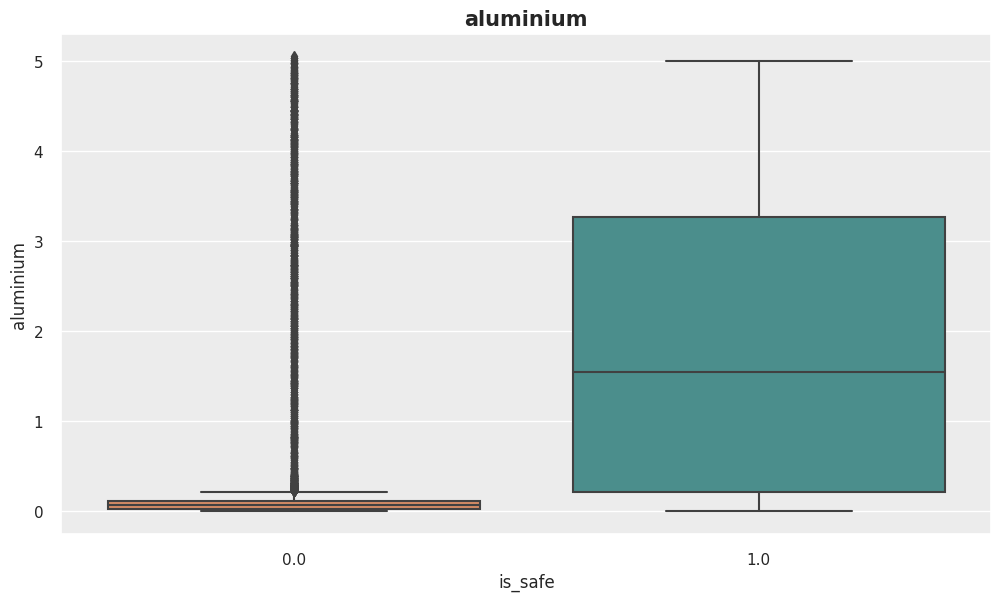

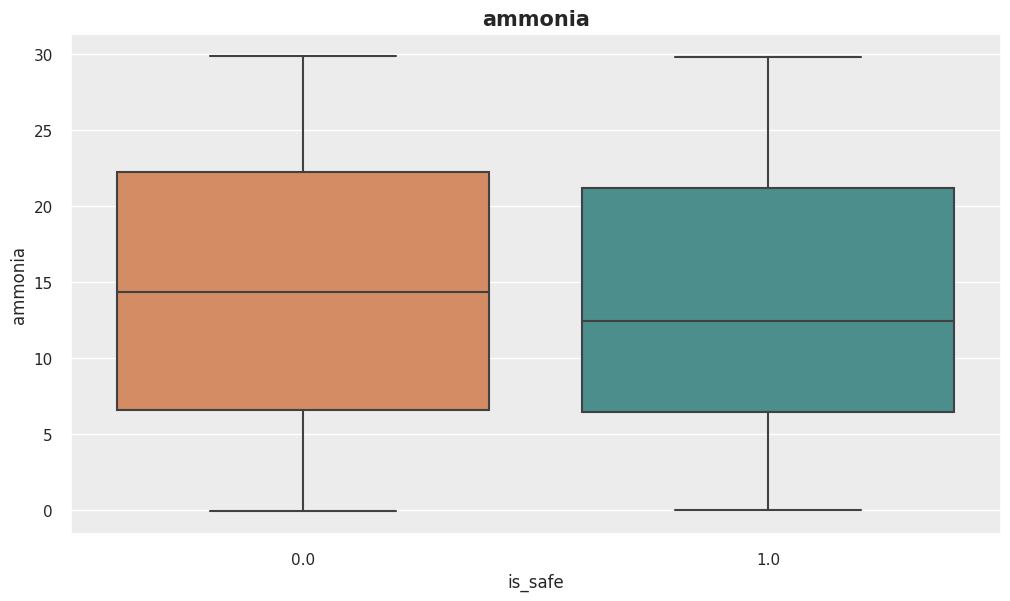

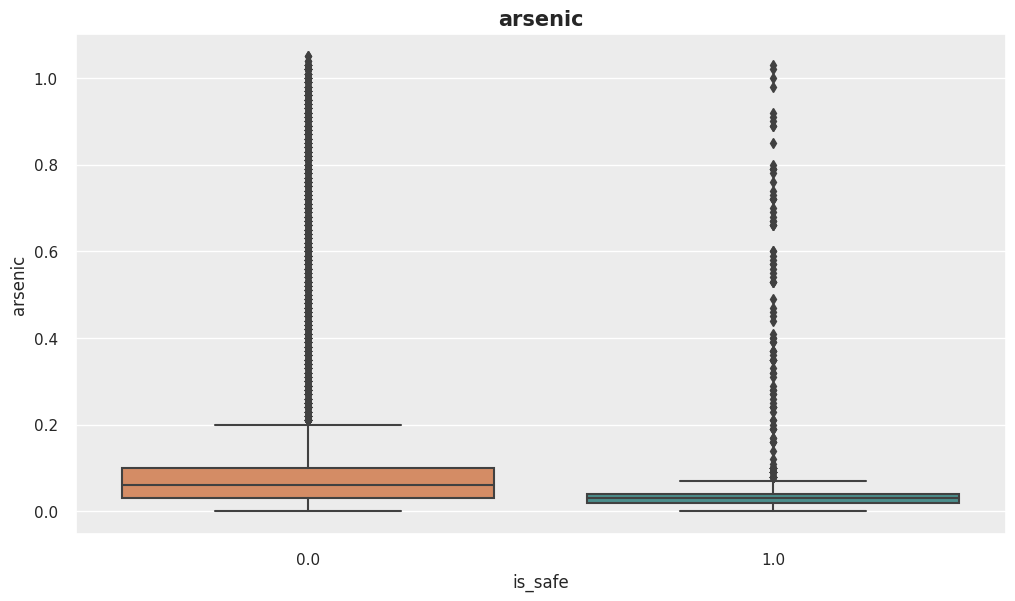

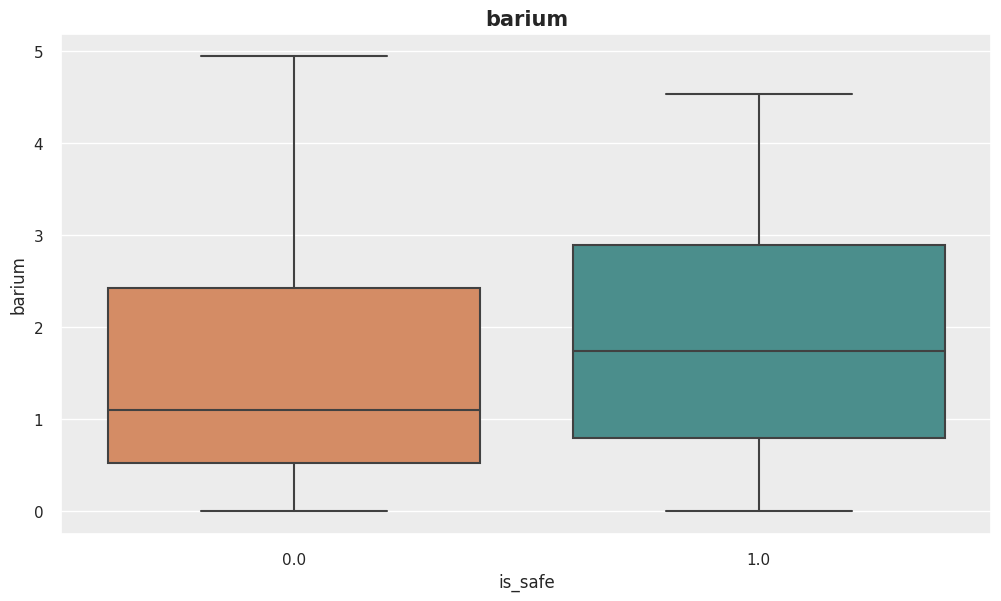

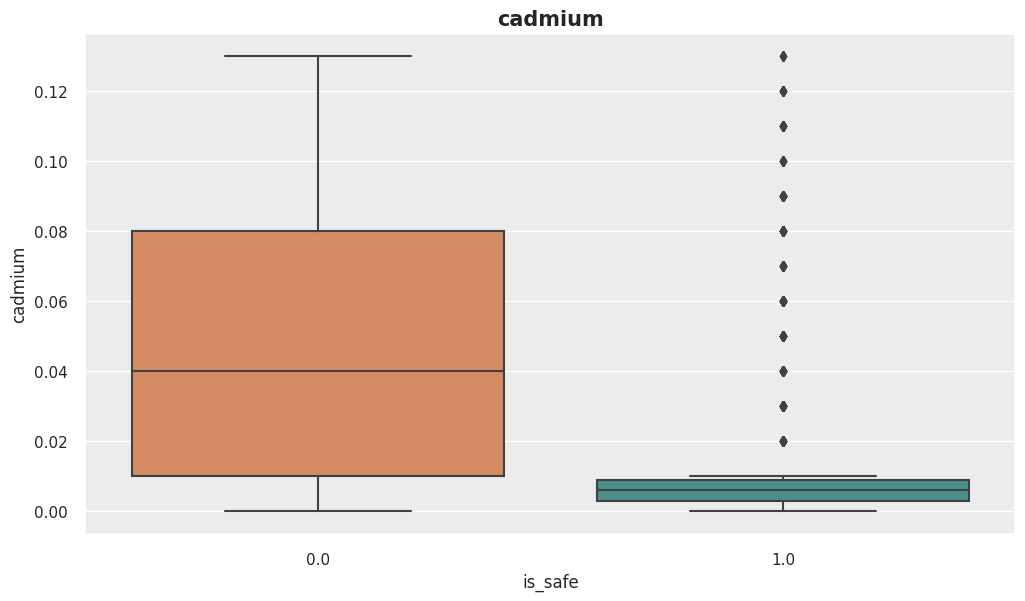

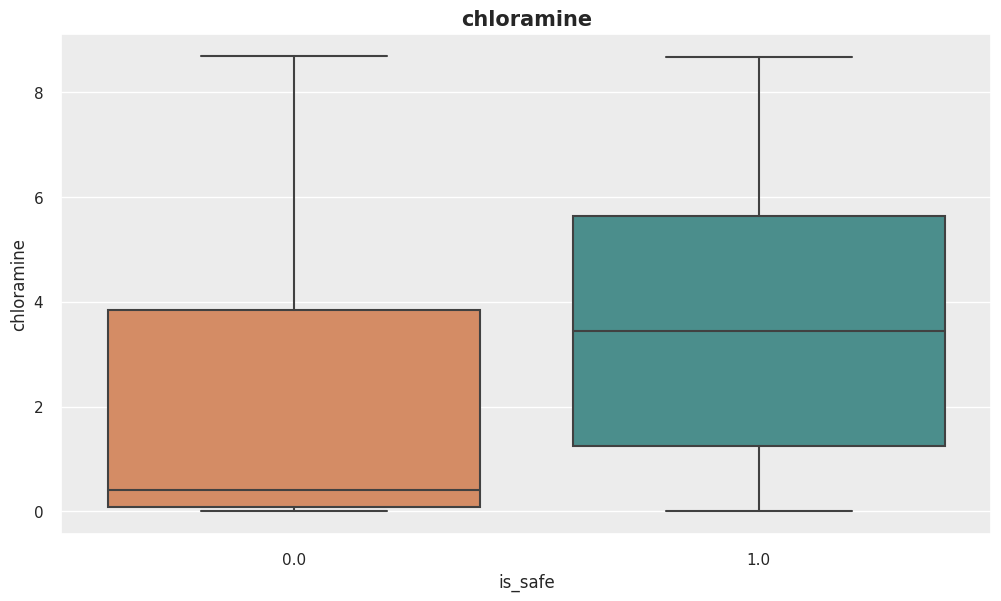

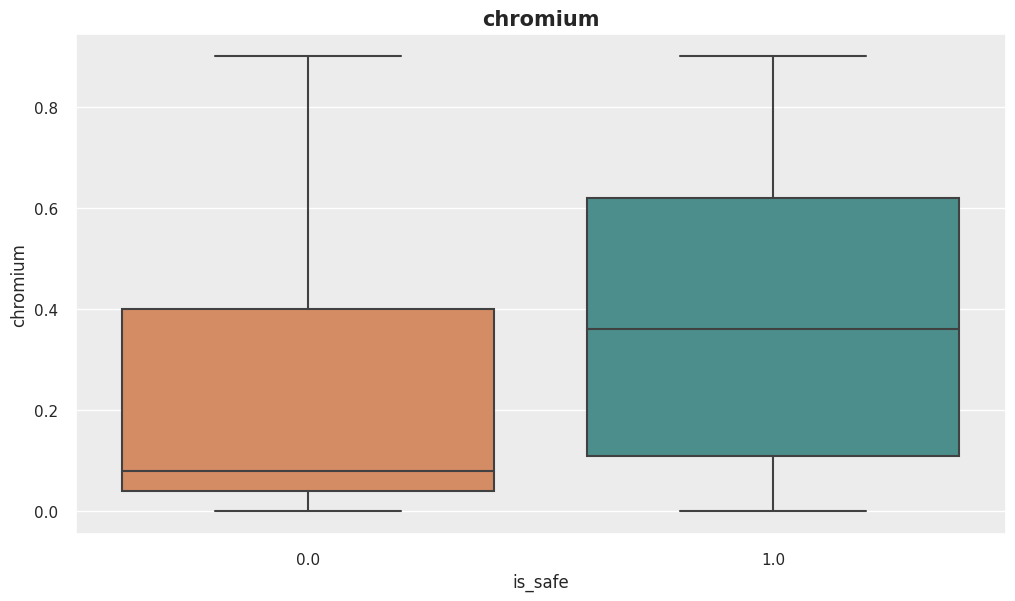

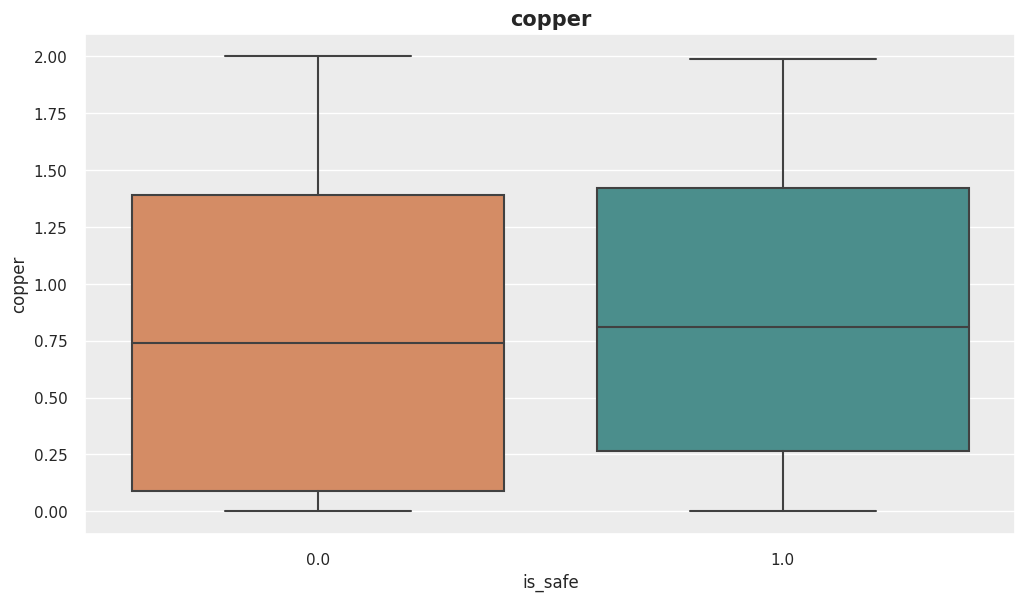

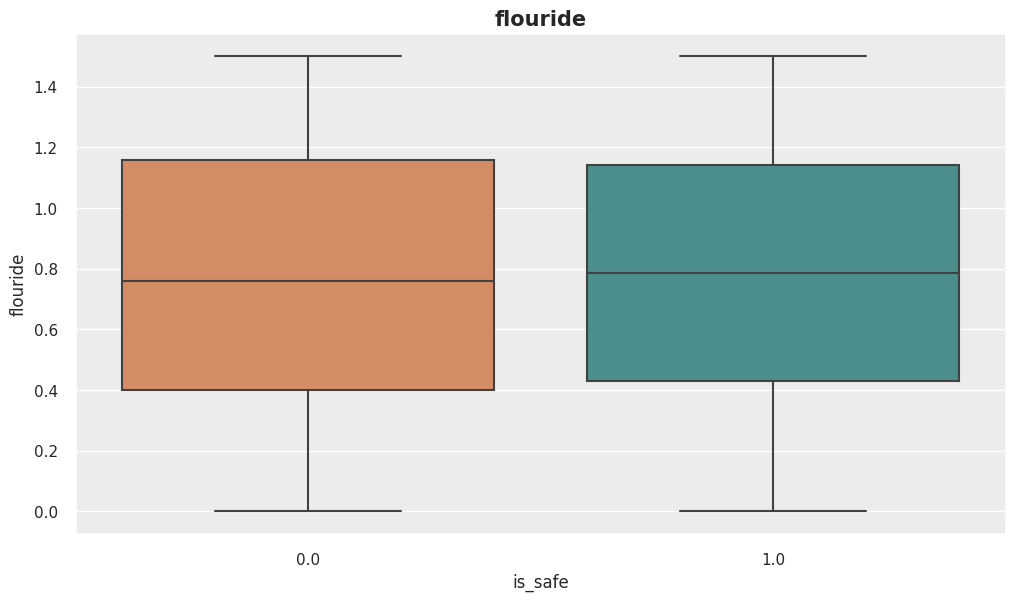

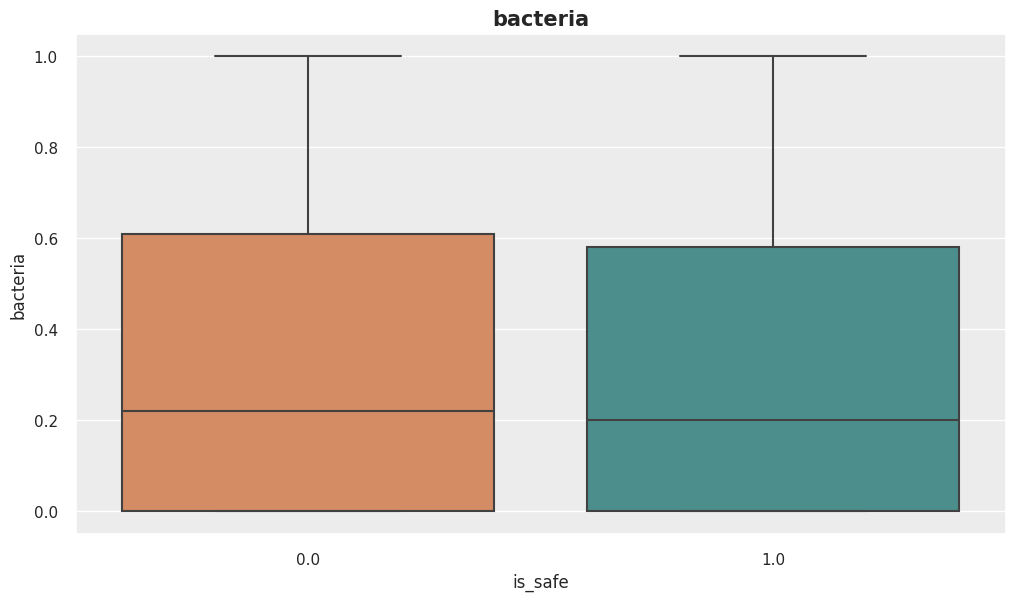

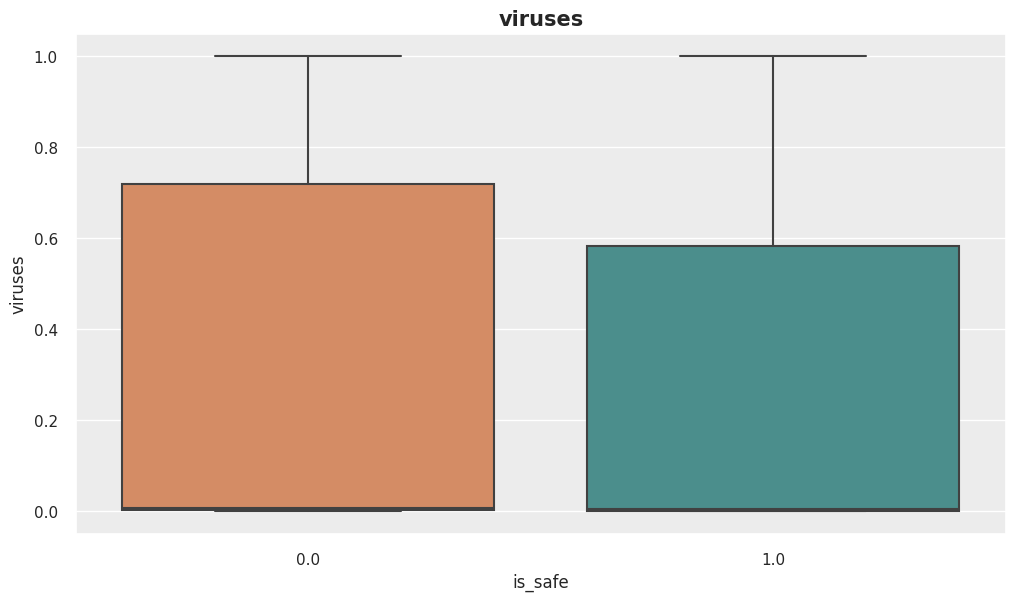

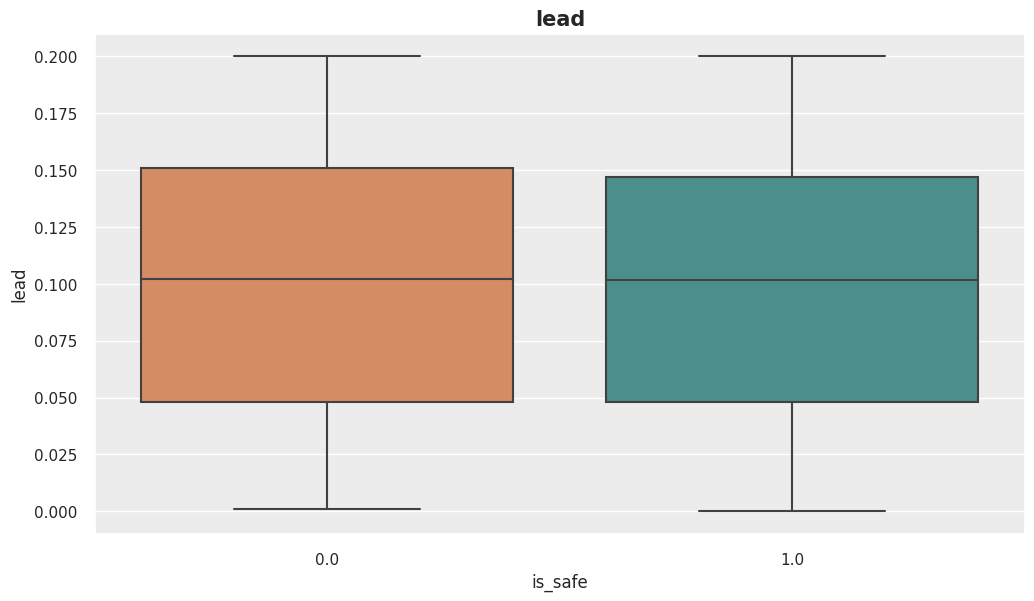

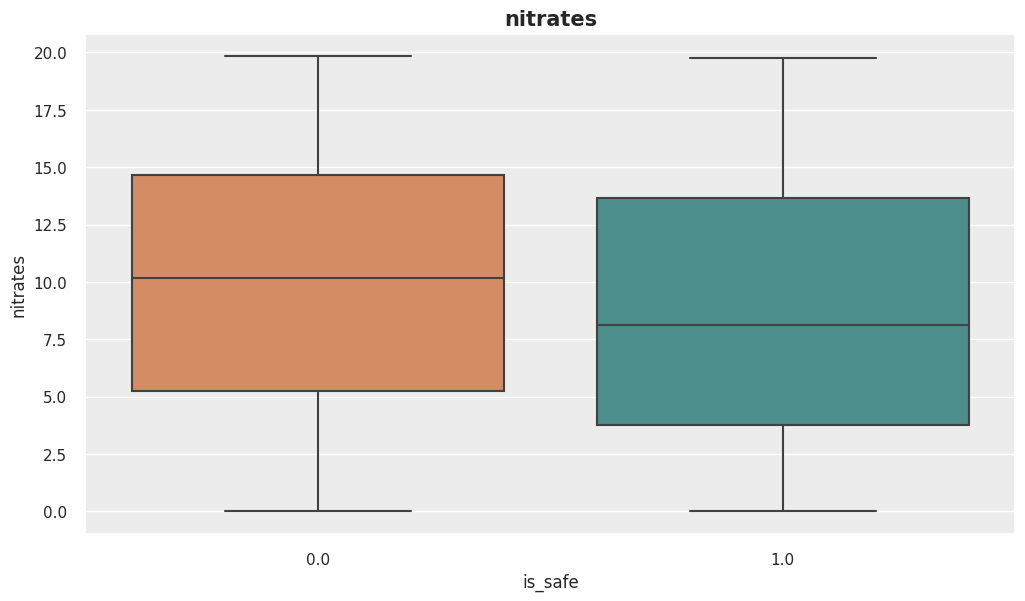

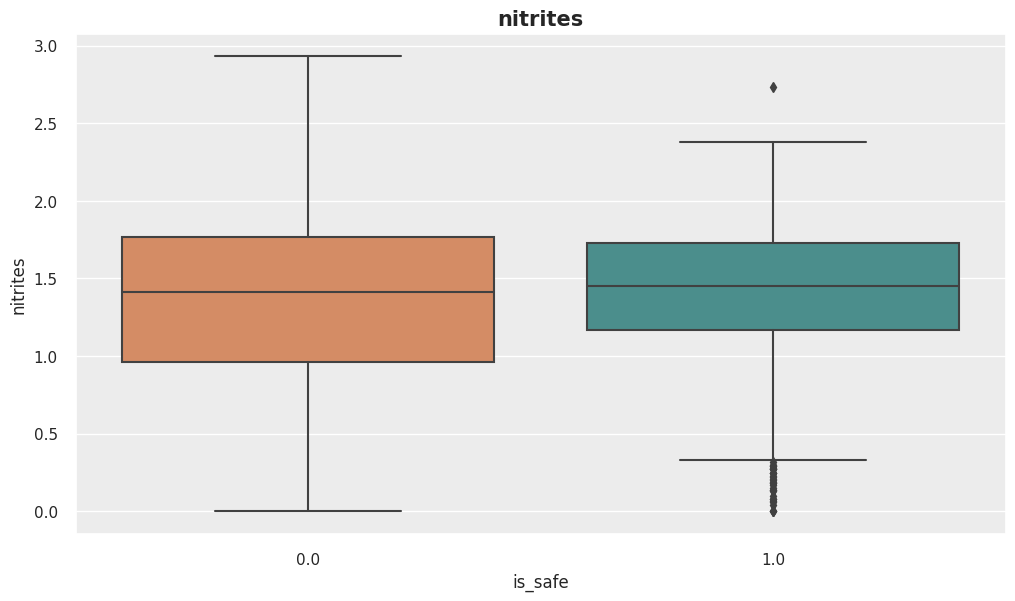

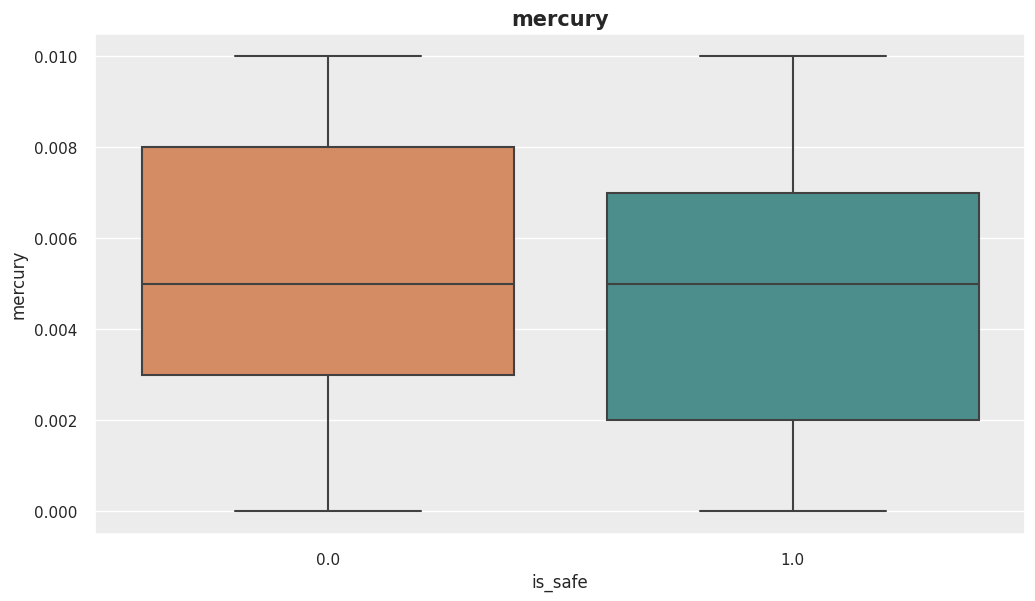

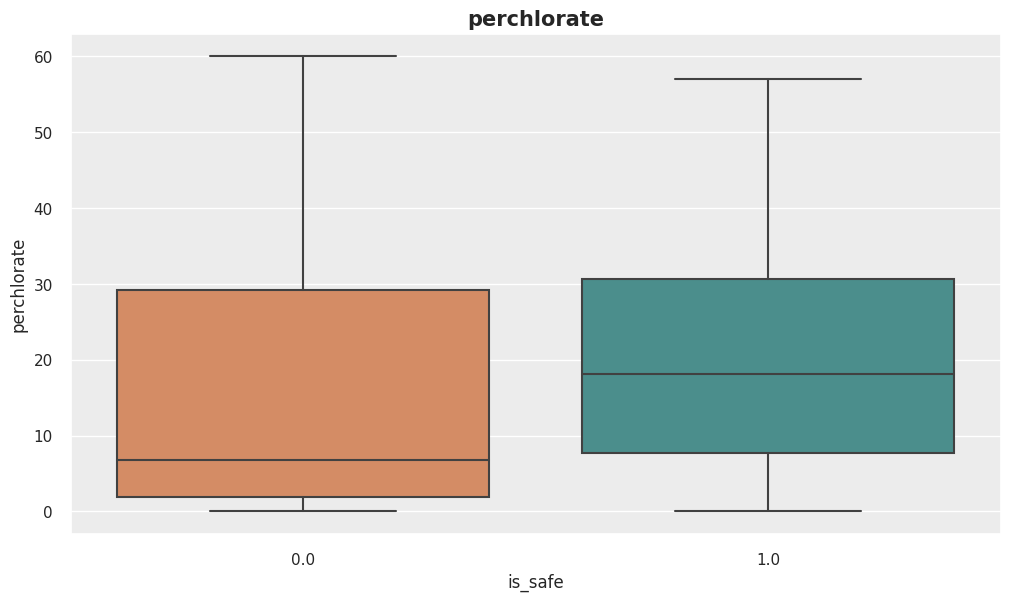

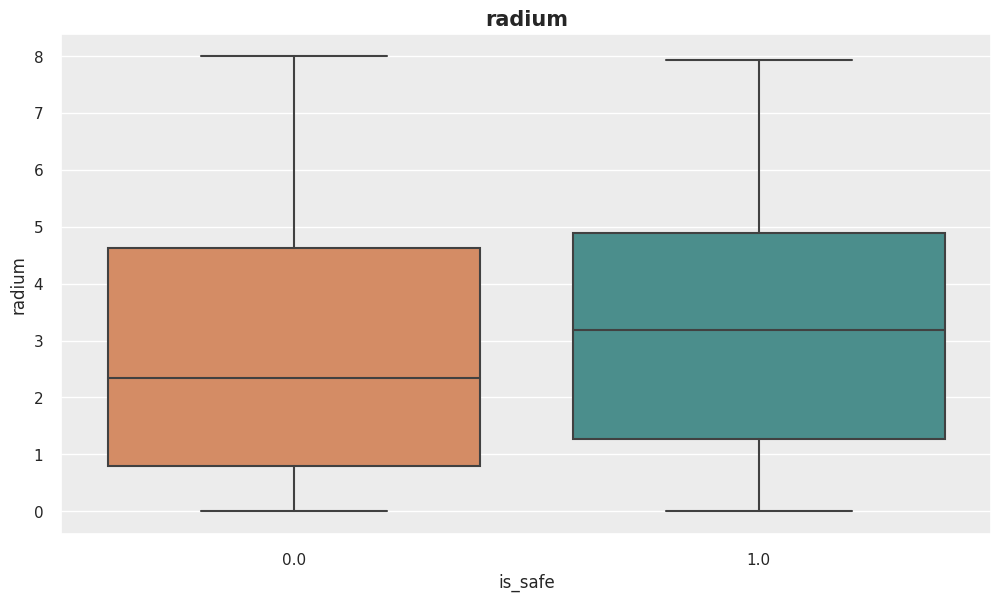

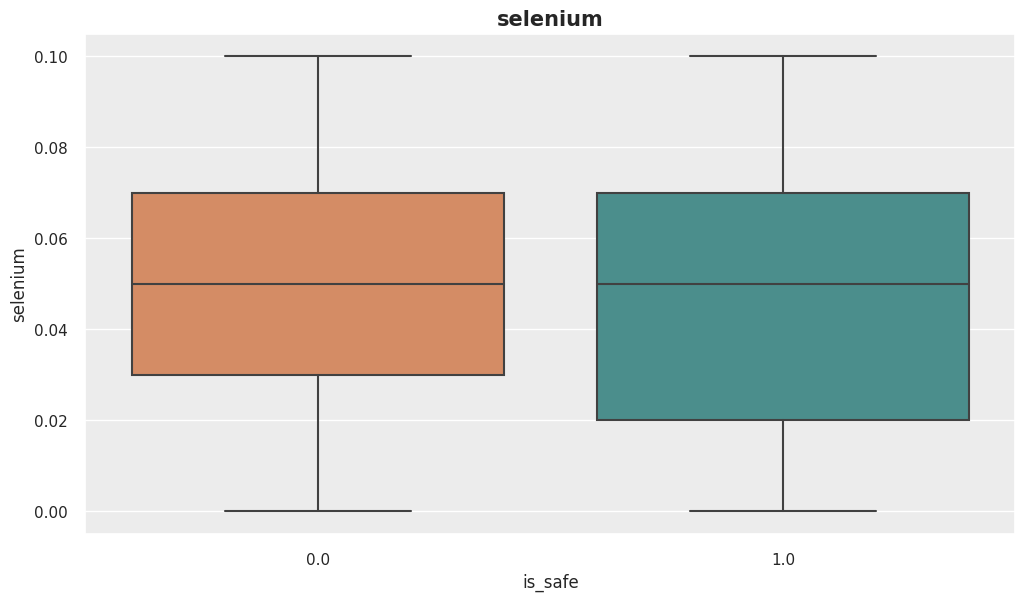

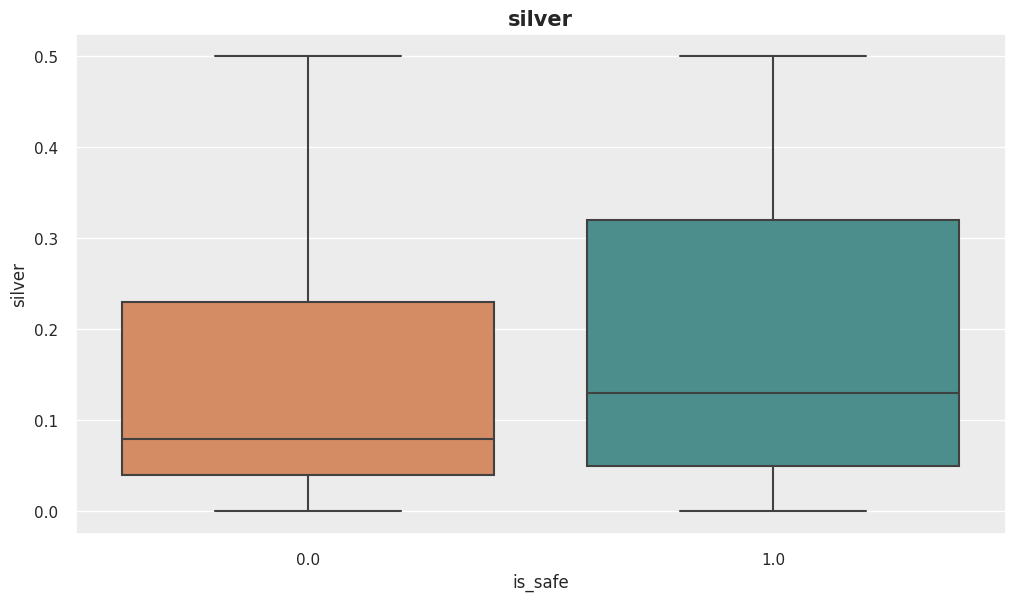

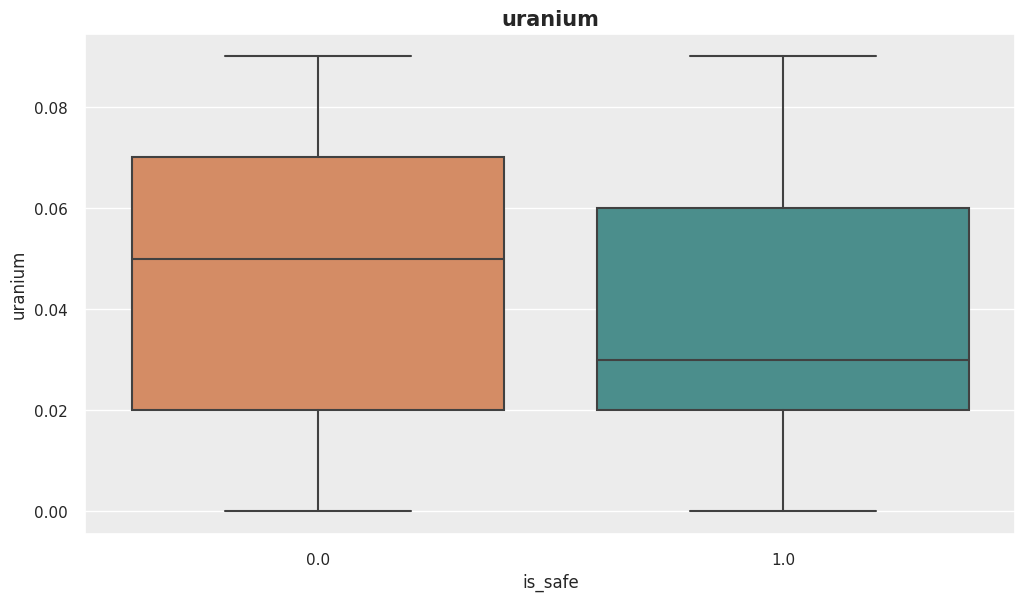

In [ ]:
#create a list of numerical features and plot them
list_of_num_features = df.loc[:, df.columns != 'is_safe']
palette_features = ['#E68753', '#409996']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of all plots

for feature in list_of_num_features:
    plt.figure(figsize=(12,6.5)) 
    plt.title(feature, fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
    ax = sns.boxplot(x = df['is_safe'], y = list_of_num_features[feature], data = df, palette=palette_features)
    #add labels to each bar
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

**Note:** ทำการ Plot ระหว่าง Feature กับ Label เพื่อดูการกระจายตัวของแต่ละ Feature เทียบกับ Label

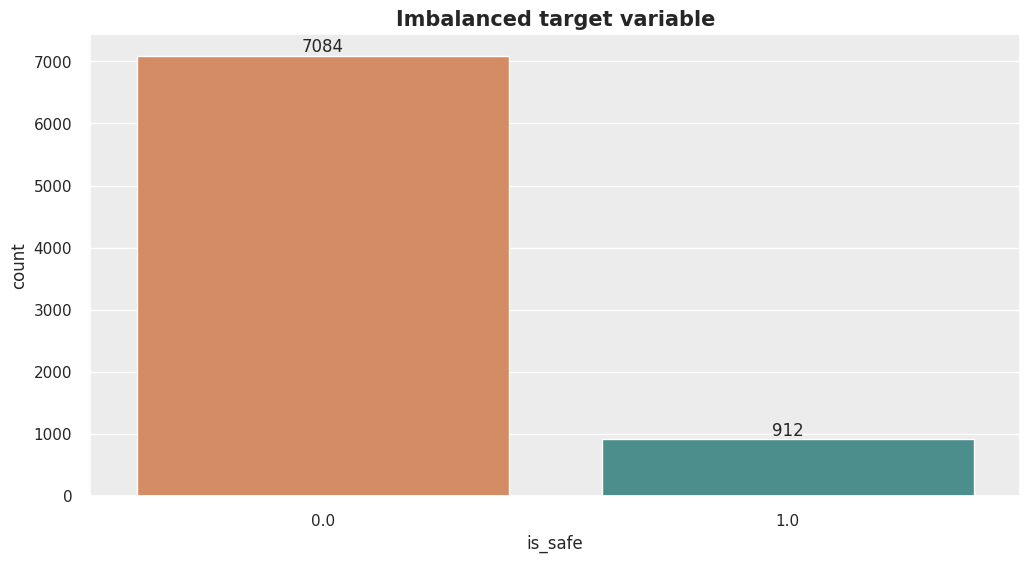

In [ ]:
#plot target variable
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(12,6))
plt.title("Imbalanced target variable", fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
ax = sns.countplot(x=df['is_safe'], data=df, palette=palette_features)

#add labels to each bar
abs_values = df['is_safe'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values) 

#show the plot
plt.show()

**Original samples distribution (0: unsafe, 1: safe)**

**Note:** จากการ Plot Label จะเห็นได้ว่า ข้อมูลที่มีค่าเป็น 0 (not safe) มีจำนวนเยอะมากกว่าข้อมูลที่มีค่าเป็น 1 (safe) ดังนั้นชุดข้อมูลนี้จึงเป็นชุดข้อมูล Imbalanced

In [ ]:
# Correlation
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
aluminium,1.000000,0.067369,0.225725,0.294091,-0.099902,0.369221,0.353134,0.168569,-0.009877,-0.078324,-0.071040,0.020957,-0.003851,0.237439,-0.003129,0.362986,0.243396,-0.003651,0.334923,0.014723,0.333974
ammonia,0.067369,1.000000,0.046783,0.070099,-0.006422,0.104775,0.124782,0.015953,-0.028221,0.063603,0.105856,-0.037065,0.006483,-0.063309,0.020884,0.090928,0.050401,0.029897,0.075547,0.014635,-0.022919
arsenic,0.225725,0.046783,1.000000,0.362925,0.334782,0.356509,0.312421,-0.036488,0.003731,0.035642,0.011596,-0.087669,0.027533,0.305113,-0.015288,0.332228,0.218328,-0.006993,0.307794,0.001469,-0.123362
barium,0.294091,0.070099,0.362925,1.000000,-0.037901,0.446869,0.415937,0.065277,-0.018637,0.101304,-0.002429,-0.042829,-0.011423,0.312783,0.006165,0.462207,0.286890,0.035222,0.431542,-0.002541,0.090858
cadmium,-0.099902,-0.006422,0.334782,-0.037901,1.000000,-0.144366,-0.157716,-0.109252,0.005005,-0.092133,0.021255,-0.035313,0.020232,-0.015829,-0.016169,-0.149269,-0.098936,0.009933,-0.155441,-0.005911,-0.256034
chloramine,0.369221,0.104775,0.356509,0.446869,-0.144366,1.000000,0.555846,0.118975,0.004254,0.154443,0.003432,-0.030241,-0.001619,0.379916,-0.021198,0.588683,0.389119,0.011435,0.522372,-0.007648,0.186704
chromium,0.353134,0.124782,0.312421,0.415937,-0.157716,0.555846,1.000000,0.113003,-0.002424,0.141937,0.002193,-0.050254,-0.012843,0.335940,-0.022541,0.524432,0.315484,0.030598,0.510705,-0.005472,0.182306
copper,0.168569,0.015953,-0.036488,0.065277,-0.109252,0.118975,0.113003,1.000000,0.011647,0.149271,0.006183,0.121762,0.002259,0.162092,0.017785,0.104527,0.026534,-0.003356,0.089241,0.006802,0.029498
flouride,-0.009877,-0.028221,0.003731,-0.018637,0.005005,0.004254,-0.002424,0.011647,1.000000,0.013984,0.018261,0.012146,-0.008245,-0.016591,-0.004263,-0.016352,0.007683,0.022726,0.014446,0.016849,0.006550
bacteria,-0.078324,0.063603,0.035642,0.101304,-0.092133,0.154443,0.141937,0.149271,0.013984,1.000000,0.618535,-0.027179,-0.033993,0.246463,-0.004406,0.147526,0.099080,-0.006779,0.148199,0.045077,-0.022077


**Note:** Plot ดูความสัมพันธ์ระหว่างแต่ละ Feature พบว่า 

bacteria กับ viruses มีความสัมพันธ์กัน 0.618535 


chloramine กับ perchlorate มีความสัมพันธ์กัน 0.588683

chloramines กับ chromium มีความสัมพันธ์กัน 0.555846 

In [ ]:
with pd.option_context('display.precision', 2):
    explore = df.describe().T.style.background_gradient(cmap='Reds')
explore

,count,mean,std,min,25%,50%,75%,max
aluminium,7996.000000,0.666396,1.265323,0.000000,0.040000,0.070000,0.280000,5.050000
ammonia,7996.000000,14.278212,8.878930,-0.080000,6.577500,14.130000,22.132500,29.840000
arsenic,7996.000000,0.161477,0.252632,0.000000,0.030000,0.050000,0.100000,1.050000
barium,7996.000000,1.567928,1.216227,0.000000,0.560000,1.190000,2.482500,4.940000
cadmium,7996.000000,0.042803,0.036049,0.000000,0.008000,0.040000,0.070000,0.130000
chloramine,7996.000000,2.177589,2.567210,0.000000,0.100000,0.530000,4.240000,8.680000
chromium,7996.000000,0.247300,0.270663,0.000000,0.050000,0.090000,0.440000,0.900000
copper,7996.000000,0.805940,0.653595,0.000000,0.090000,0.750000,1.390000,2.000000
flouride,7996.000000,0.771646,0.435423,0.000000,0.407500,0.770000,1.160000,1.500000
bacteria,7996.000000,0.319714,0.329497,0.000000,0.000000,0.220000,0.610000,1.000000


**Note:** Plot ดูค่าสถิติเบื้องต้นของแต่ละคอลัมน์

# **3. Model evaluation by using original data**

ทดลองนำข้อมูล Original Data ที่เป็น Imbalance มาทดสอบเข้า Model ทั้งหมด 3 Model ดังนี้

In [ ]:
y = df['is_safe']

In [ ]:
X = df.drop('is_safe', axis=1)

In [ ]:
X.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02


In [ ]:
y.head()

0    1.0
1    1.0
2    0.0
3    1.0
4    1.0
Name: is_safe, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=100)

In [ ]:
# Build and train a linear SVM model
lns = svm.SVC(kernel='linear')
lns.fit(X_train, y_train)
# get the predictions for the test set
PredSVM = lns.predict(X_test)

In [ ]:
# Evaluation of the linear SVM using the original data
print('Evaluation of the linear SVM using the original data')
print(metrics.classification_report(y_test, PredSVM))
print('Precision: {}'.format(metrics.precision_score(y_test, PredSVM)))
print('Recall: {}'.format(metrics.recall_score(y_test, PredSVM)))
print('Geometric Mean: {}'.format(geometric_mean_score(y_test, PredSVM)))

Evaluation of the linear SVM using the original data
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      1418
         1.0       0.78      0.27      0.41       182

    accuracy                           0.91      1600
   macro avg       0.85      0.63      0.68      1600
weighted avg       0.90      0.91      0.89      1600

Precision: 0.78125
Recall: 0.27472527472527475
Geometric Mean: 0.521548555195155


In [ ]:
# build and train a logistic regression model
logreg = LogisticRegression(solver='liblinear', max_iter=1000, random_state=100)
logreg.fit(X_train, y_train)
# get the predictions for the test set
PredLR = logreg.predict(X_test)

In [ ]:
# Evaluation of the linear Regression model using the original data
print('Evaluation of the linear Regression model using the original data')
print(metrics.classification_report(y_test, PredLR))
print('Precision: {}'.format(metrics.precision_score(y_test, PredLR)))
print('Recall: {}'.format(metrics.recall_score(y_test, PredLR)))
print('Geometric Mean: {}'.format(geometric_mean_score(y_test, PredLR)))

Evaluation of the linear Regression model using the original data
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95      1418
         1.0       0.67      0.25      0.36       182

    accuracy                           0.90      1600
   macro avg       0.79      0.62      0.65      1600
weighted avg       0.88      0.90      0.88      1600

Precision: 0.6716417910447762
Recall: 0.24725274725274726
Geometric Mean: 0.49337274748234305


In [ ]:
# Create a Random Forest classifier (ensemble) - without sample weights
RF = RandomForestClassifier(n_estimators=21, max_leaf_nodes=20, random_state=100)
RF.fit(X_train, y_train)
PredRF = RF.predict(X_test)
PredProbRF = RF.predict_proba(X_test)

In [ ]:
# Evaluation of the Random Forest model using the original data
print('Evaluation of the Random Forest model using the original data')
print(metrics.classification_report(y_test, PredRF))
print('Precision: {}'.format(metrics.precision_score(y_test, PredRF)))
print('Recall: {}'.format(metrics.recall_score(y_test, PredRF)))
print('Geometric Mean: {}'.format(geometric_mean_score(y_test, PredRF)))

Evaluation of the Random Forest model using the original data
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      1418
         1.0       0.85      0.53      0.66       182

    accuracy                           0.94      1600
   macro avg       0.90      0.76      0.81      1600
weighted avg       0.93      0.94      0.93      1600

Precision: 0.8508771929824561
Recall: 0.532967032967033
Geometric Mean: 0.7256565594713642


**Note:** จากการนำข้อมูล Original Data มาทดสอบเข้า Model ทั้ง 3 Model ได้ค่า Accuracy ดังนี้

1. SVM Model ได้ค่า Accuracy = 0.91

2. Logistic Regression Model ได้ค่า Accuracy = 0.90

3. Random Forest Model ได้ค่า Accuracy = 0.94

สรุปได้ว่า Random Forest Model มีค่า Accuracy สูงที่สุด

# **4. เปรียบเทียบประสิทธิภาพของเทคนิคการแก้ปัญหา imbalanced อย่างน้อย 3 วิธีขึ้นไป**

**4.1 Class Re-Weights**

ใช้ sample weights  โดยเอา Label ที่มีจำนวนน้อยกว่า(safe OR 1) มา weight โดยคูณ 5 ซึ่งเป็นค่าที่ดีที่สุดที่ทำให้ precision and recall  balance

In [ ]:
sample_weights = (1 * (y_train == 0)) + (5 * (y_train == 1))

In [ ]:
RF_weighted = RandomForestClassifier(n_estimators=25, max_leaf_nodes=20, random_state=100)
RF_weighted.fit(X_train, y_train, sample_weight=sample_weights)
PredRFWeighted = RF_weighted.predict(X_test)
PredProbRFWeighted = RF_weighted.predict_proba(X_test)


In [ ]:
print('The Results of the Random Forest Classifier using weighted samples')
print(metrics.classification_report(y_test, PredRFWeighted))
print('Precision: {}'.format(metrics.precision_score(y_test, PredRFWeighted)))
print('Recall: {}'.format(metrics.recall_score(y_test, PredRFWeighted)))
print('Geometric Mean Score: {}'.format(geometric_mean_score(y_test, PredRFWeighted)))

The Results of the Random Forest Classifier using weighted samples
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      1418
         1.0       0.68      0.76      0.72       182

    accuracy                           0.93      1600
   macro avg       0.82      0.86      0.84      1600
weighted avg       0.94      0.93      0.93      1600

Precision: 0.6780487804878049
Recall: 0.7637362637362637
Geometric Mean Score: 0.8533396718818922


**4.2 SMOTE**

Shape of X_train_bl:  (11332, 20)
Shape of X_test:  (1600, 20)

RandomOverSampler, counts of label '1', %: 50.0
RandomOverSampler, counts of label '0', %: 50.0


<Axes: >

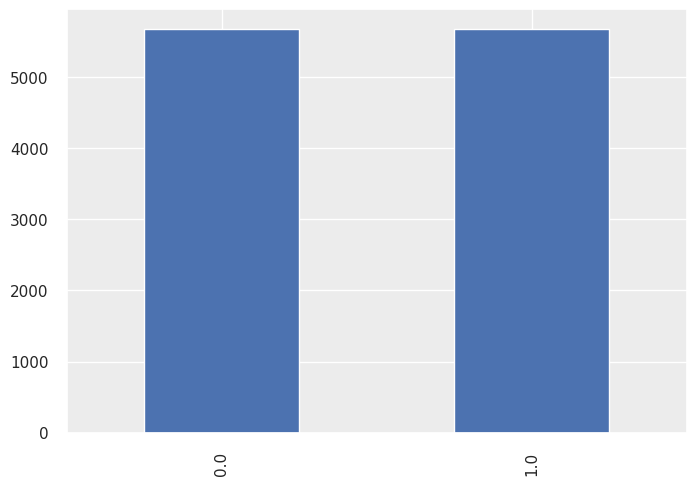

In [ ]:
# sm = RandomOverSampler(random_state=100) # uncomment for Random oversampling
sm = SMOTE(random_state=100) # uncomment for oversampling using SMOTE
X_train_bl, y_train_bl = sm.fit_resample(X_train, y_train)
print("Shape of X_train_bl: ", X_train_bl.shape)
print("Shape of X_test: ", X_test.shape)
print()
print("RandomOverSampler, counts of label '1', %: {:.1f}".format(sum(y_train_bl==1)/len(y_train_bl)*100.0,2))
print("RandomOverSampler, counts of label '0', %: {:.1f}".format(sum(y_train_bl==0)/len(y_train_bl)*100.0,2))

y_train_bl.value_counts().plot.bar()

In [ ]:
RF.fit(X_train_bl, y_train_bl)
PredRFOversampling = RF.predict(X_test)
PredProbRFOversampling = RF.predict_proba(X_test)

In [ ]:
print('The Results of the Random Forest Classifier using over-sampling')
print(metrics.classification_report(y_test, PredRFOversampling))
print('Precision: {}'.format(metrics.precision_score(y_test, PredRFOversampling)))
print('Recall: {}'.format(metrics.recall_score(y_test, PredRFOversampling)))
print('Geometric Mean Score: {}'.format(geometric_mean_score(y_test, PredRFOversampling)))

The Results of the Random Forest Classifier using over-sampling
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95      1418
         1.0       0.58      0.73      0.64       182

    accuracy                           0.91      1600
   macro avg       0.77      0.83      0.79      1600
weighted avg       0.92      0.91      0.91      1600

Precision: 0.5764192139737991
Recall: 0.7252747252747253
Geometric Mean Score: 0.8219862730400238


**4.3 OverSampling**

Shape of x_train_ros:  (11332, 20)
Shape of x_test:  (1600, 20)

RandomOverSampler, counts of label '1', %: 50.0
RandomOverSampler, counts of label '0', %: 50.0


<Axes: >

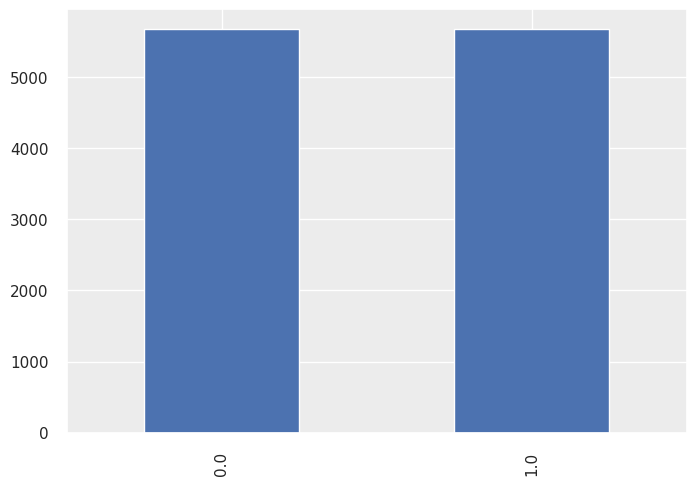

In [ ]:
ros = RandomOverSampler(random_state=2)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print("Shape of x_train_ros: ", X_train_ros.shape)
print("Shape of x_test: ", X_test.shape)
print()
print("RandomOverSampler, counts of label '1', %: {:.1f}".format(sum(y_train_ros==1)/len(y_train_ros)*100.0,2))
print("RandomOverSampler, counts of label '0', %: {:.1f}".format(sum(y_train_ros==0)/len(y_train_ros)*100.0,2))
y_train_ros.value_counts().plot.bar()

In [ ]:
RF.fit(X_train_ros, y_train_ros)
PredRFRandomOverSampling = RF.predict(X_test)
PredProbRFRandomOversampling = RF.predict_proba(X_test)

In [ ]:
print('The Results of the Random Forest Classifier using over-sampling')
print(metrics.classification_report(y_test,PredRFRandomOverSampling))
print('Precision: {}'.format(metrics.precision_score(y_test, PredRFRandomOverSampling)))
print('Recall: {}'.format(metrics.recall_score(y_test, PredRFOversampling)))
print('Geometric Mean Score: {}'.format(geometric_mean_score(y_test, PredRFRandomOverSampling)))

The Results of the Random Forest Classifier using over-sampling
              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95      1418
         1.0       0.57      0.86      0.68       182

    accuracy                           0.91      1600
   macro avg       0.77      0.89      0.82      1600
weighted avg       0.93      0.91      0.92      1600

Precision: 0.5667870036101083
Recall: 0.7252747252747253
Geometric Mean Score: 0.8886144333822746


**Note:** จากข้อ 3 ที่นำข้อมูล Original Data มาทดสอบทั้ง 3 Model  พบว่าค่า Accuracy ของ Random Forest Model มีค่ามากที่สุด เราจึงเลือก Random Forest Model มาทำการแก้ปัญหา Imbalance ต่อ

ซึ่งจากที่ได้ทำการแก้ปัญหา Imbalance ด้วยเทคนิค Class Re-Weights , SMOTE และ OverSampling สรุปได้ว่า การแก้ปัญหาด้วยวิธี Class Re-Weights ดีที่สุด เนื่องจากได้ค่า Accuracy = 0.93 (แต่ก็ยังน้อยกว่า Accuracy ของ Original Data ซึ่งเท่ากับ 0.94 )

ดังนั้น จะเห็นได้ว่าการแก้ปัญหาด้วยวิธี Imbalance ไม่ได้ทำให้ Accuracy สูงกว่าเดิม สำหรับข้อมูลชุดนี้

# **5. การเลือกฟีเจอร์**

**feature Correlation**

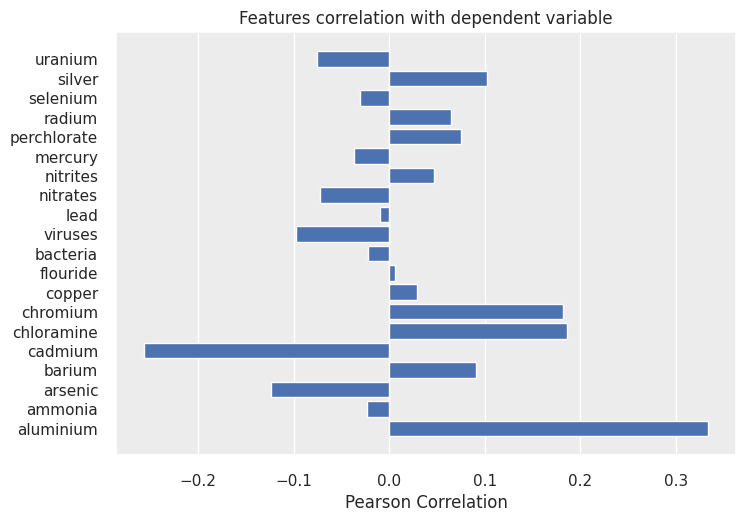

In [ ]:
feature_correlation(X, y);

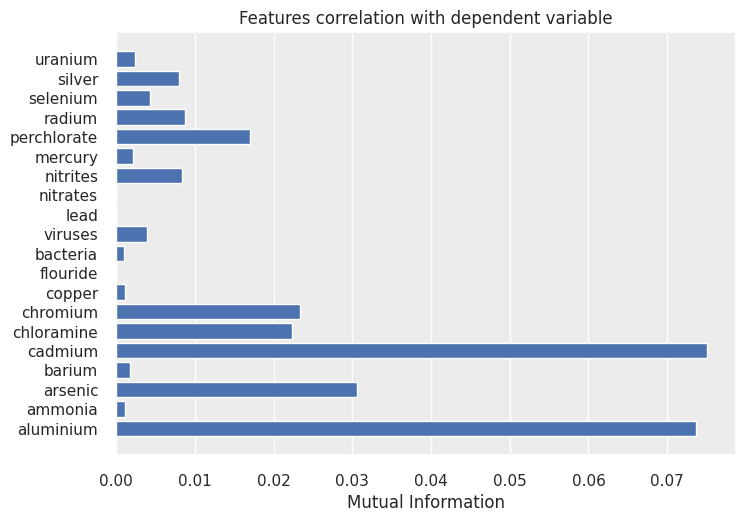

In [ ]:
feature_correlation(X, y, method='mutual_info-classification');

<Axes: >

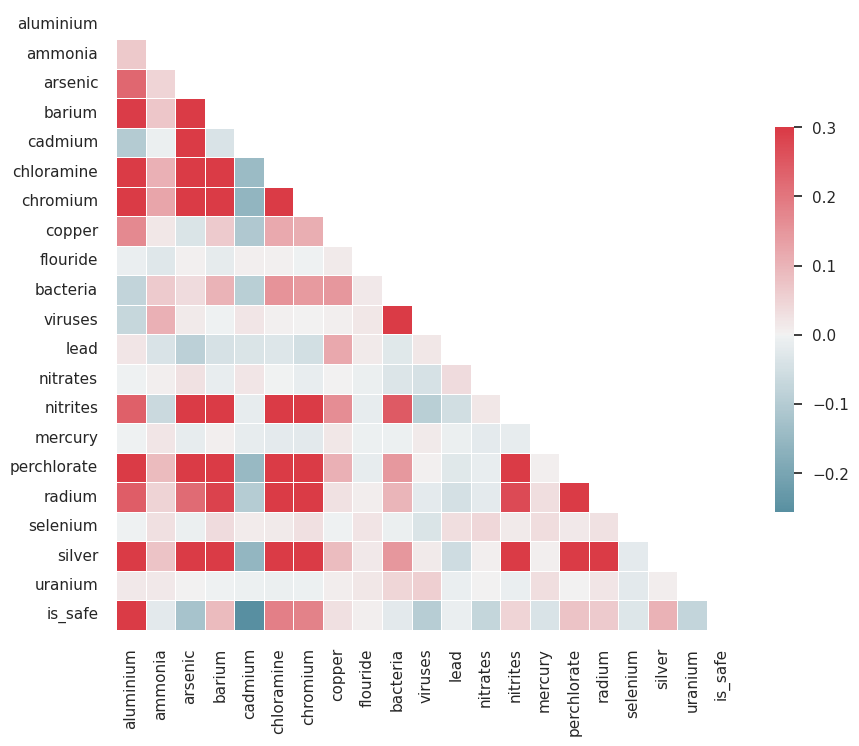

In [ ]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# ***Feature importance***



เราเลือกใช้ Model ที่น่าสนใจ  2 Model คือ

1.Random Forest Model

2.Logistic regression Model

**การทำ Feature Selection ด้วย Random Forest Model**



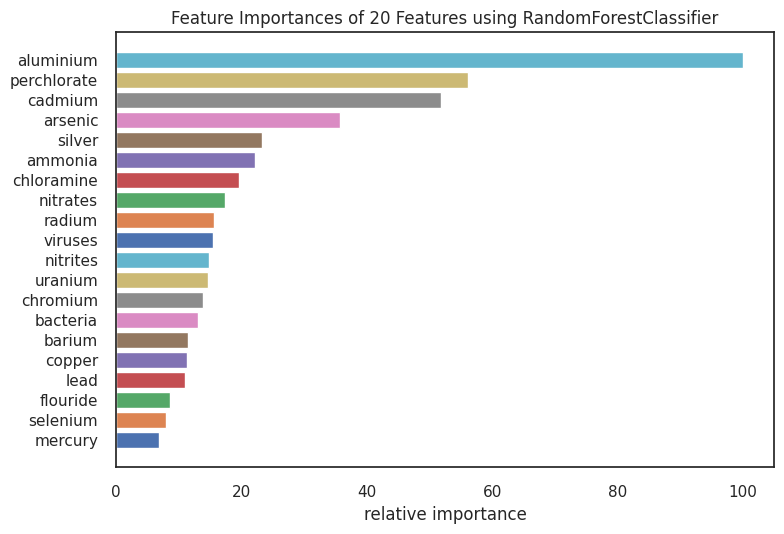

In [ ]:
feature_importances(RandomForestClassifier(criterion='gini', n_estimators=50), X, y);

**Note:**  จากกราฟดูความสำคัญของแต่ละ Feature พบว่า Feature mercury มีความสำคัญน้อยที่สุด เราจึงจะทำการตัด Feature mercury ทิ้งก่อน

In [ ]:
# create the classifier with n_estimators = 21

clf = RandomForestClassifier(n_estimators=21, random_state=100)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=21, random_state=100)

In [ ]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

aluminium      0.223057
perchlorate    0.119677
cadmium        0.104925
arsenic        0.070502
ammonia        0.048281
silver         0.042740
chloramine     0.041369
nitrates       0.038670
uranium        0.033656
viruses        0.032626
radium         0.031719
nitrites       0.031254
chromium       0.027735
bacteria       0.026855
barium         0.026849
lead           0.025844
copper         0.024393
flouride       0.019298
selenium       0.018289
mercury        0.012265
dtype: float64

Build the Random Forest model on selected features 

1.ทดลองตัด Feature ที่มีค่าความสำคัญน้อยที่สุด 1 Feature ออก คือ mercury

In [ ]:
#drop the least important feature from X_train and X_test

X_train1 = X_train.drop(['mercury'], axis=1)

X_test1 = X_test.drop(['mercury'], axis=1)

In [ ]:
# instantiate the classifier with n_estimators = 21
clf = RandomForestClassifier(n_estimators=21, random_state=100)

# fit the model to the training set
clf.fit(X_train1, y_train)


# Predict on the test set results
y_pred = clf.predict(X_test1)

# Check accuracy score 
print('Model accuracy score with mercury variable removed : {0:0.2f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with mercury variable removed : 0.96


*Note:** ทำการตัด Feature mercury ได้ค่า Accuracy = 0.96

2.ทดลองตัด Feature ที่มีค่าความสำคัญน้อยที่สุด 2 Feature ออก คือ mercury และ selenium

In [ ]:
#drop the least important feature from X_train and X_test

X_train2 = X_train.drop(['mercury','selenium'], axis=1)

X_test2 = X_test.drop(['mercury','selenium'], axis=1)

In [ ]:
# instantiate the classifier with n_estimators = 21
clf = RandomForestClassifier(n_estimators=21, random_state=100)

# fit the model to the training set
clf.fit(X_train2, y_train)


# Predict on the test set results
y_pred = clf.predict(X_test2)

# Check accuracy score 
print('Model accuracy score with mercury variable removed : {0:0.2f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with mercury variable removed : 0.95


**Note:** ทำการตัด Feature mercury และ selenium  ได้ค่า Accuracy = 0.95

3.ทดลองตัด Feature ที่มีค่าความสำคัญน้อยที่สุด 3 Feature ออก คือ Feature mercury, selenium และ flouride

In [ ]:
#drop the least important feature from X_train and X_test

X_train3 = X_train.drop(['mercury','selenium','flouride'], axis=1)

X_test3 = X_test.drop(['mercury','selenium','flouride'], axis=1)

In [ ]:
# instantiate the classifier with n_estimators = 21
clf = RandomForestClassifier(n_estimators=21, random_state=100)

# fit the model to the training set
clf.fit(X_train3, y_train)


# Predict on the test set results
y_pred = clf.predict(X_test3)

# Check accuracy score 
print('Model accuracy score with mercury variable removed : {0:0.2f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with mercury variable removed : 0.95


**Note:** ทำการตัด Feature mercury, selenium และ flouride  ได้ค่า Accuracy = 0.95

4.ทดลองตัด Feature ที่มีค่าความสำคัญน้อยที่สุด 10 Feature

In [ ]:
#drop the least important feature from X_train and X_test

X_train4 = X_train.drop(['mercury','selenium','flouride','copper','lead','barium','bacteria','chromium','nitrites','radium'], axis=1)

X_test4 = X_test.drop(['mercury','selenium','flouride','copper','lead','barium','bacteria','chromium','nitrites','radium'], axis=1)

In [ ]:
# instantiate the classifier with n_estimators = 21
clf = RandomForestClassifier(n_estimators=21, random_state=100)

# fit the model to the training set
clf.fit(X_train4, y_train)


# Predict on the test set results
y_pred = clf.predict(X_test4)

# Check accuracy score 
print('Model accuracy score with mercury variable removed : {0:0.2f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with mercury variable removed : 0.95


**Note:** ทำการตัด Feature 'mercury','selenium','flouride','copper','lead','barium','bacteria','chromium','nitrites','radium  ได้ค่า Accuracy = 0.95

**สรุป** จากการทำ Feature Selection ด้วย RandomForest Model สามารถสรุปได้ดังนี้
1. ทดลองตัด Feature ที่มีค่าความสำคัญน้อยที่สุด 1 Feature ออก คือ mercury ได้ค่า Accuracy = 0.96

2. ทดลองตัด Feature ที่มีค่าความสำคัญน้อยที่สุด 2 Feature ออก คือ mercury และ selenium ได้ค่า Accuracy = 0.95

3. ทดลองตัด Feature ที่มีค่าความสำคัญน้อยที่สุด 3 Feature ออก คือ Feature mercury, selenium และ flouride ได้ค่า Accuracy = 0.95

4. ทดลองตัด Feature ที่มีค่าความสำคัญน้อยที่สุด 10 Feature ได้ค่า Accuracy = 0.95

จึงสรุปได้ว่า 

1. การตัด Feature ที่มีความสำคัญน้อยที่สุดออกเพียง 1 Feature ให้ค่า  Accuracy  สูงที่สุด 
2. เปรียบเทียบค่า Accuracy ระหว่างตัดการ Feature และไม่ตัด Feature พบว่าการตัด Feature ให้ค่า Accuracy มากกว่าการใช้ข้อมูลเต็ม Feature(Accuracy = 0.94)

**การทำ Feature Selection ด้วย Logistic regression Model**

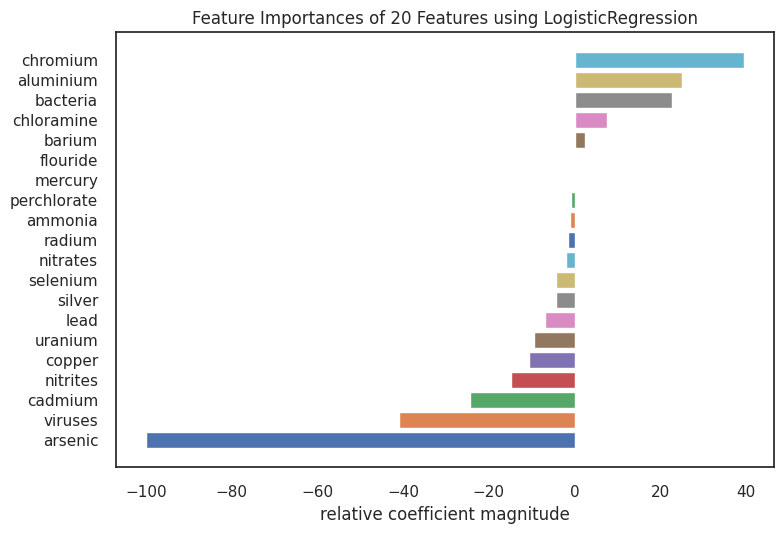

In [ ]:
feature_importances(LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5), X, y);

In [ ]:
from sklearn.preprocessing import scale
X_train_scaled = scale(X_train)
cov = np.cov(X_train_scaled, rowvar=False)

In [ ]:
#Feature selection 
#Recursive feature elimination
from sklearn.feature_selection import RFE
classifier = LogisticRegression()

#Select best feature 
rfe = RFE(classifier, n_features_to_select= None)
rfe = rfe.fit(X_train_scaled, y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

[ True False  True False  True  True  True  True False False  True False
  True False False  True False False False  True]
[ 1  2  1  6  1  1  1  1 11  3  1 10  1  5  8  1  9  7  4  1]


Index(['aluminium', 'arsenic', 'cadmium', 'chloramine', 'chromium', 'copper',
       'viruses', 'nitrates', 'perchlorate', 'uranium'],
      dtype='object')

<Axes: >

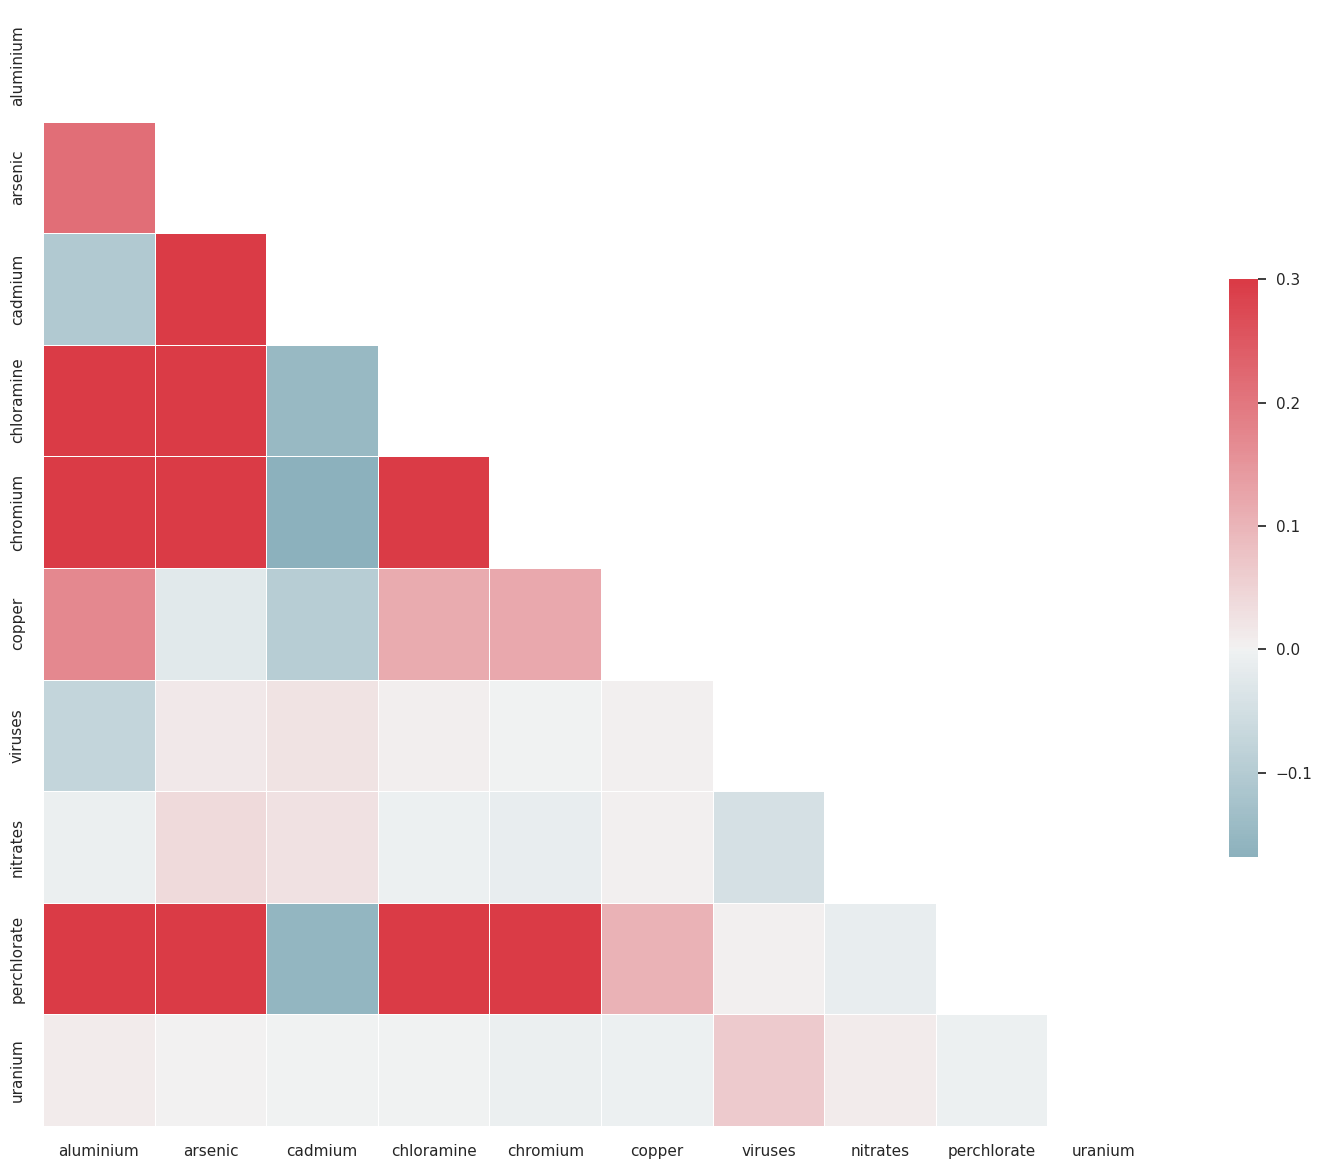

In [ ]:
# New Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = X_train[X_train.columns[rfe.support_]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})  

In [ ]:
# # Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, penalty= 'l2')
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix

# Predicting Test Set
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Logistic Regression RFE (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression RFE (Lasso),0.90375,0.705882,0.263736,0.384


**สรุป** จากการทำ Feature Selection ด้วย LogisticRegression สามารถสรุปได้ดังนี้
1. ทำการ scaled Feature ก่อน 
2. เลือก Feature ที่มีความสำคัญ
3. ดูความสัมพันธ์ระหว่าง Feature จาก Correlation Matrix 
4. เอาเข้า Model แล้วได้ Accuracy = 0.90375 


จึงสรุปได้ว่า 

1. การทำ Feature Selection ด้วย LogisticRegression ให้ค่า Accuracy มากกว่าการใช้ข้อมูลเต็ม Feature (Accuracy = 0.90)

**Note:** ดังนั้นจึงสรุปได้ว่า การทำ Feature Selection ด้วย Random Forest model และ LogisticRegression model ให้ค่าความสำคัญของแต่ละ Feature แตกต่างกัน  

# **6.การทำ PCA** 

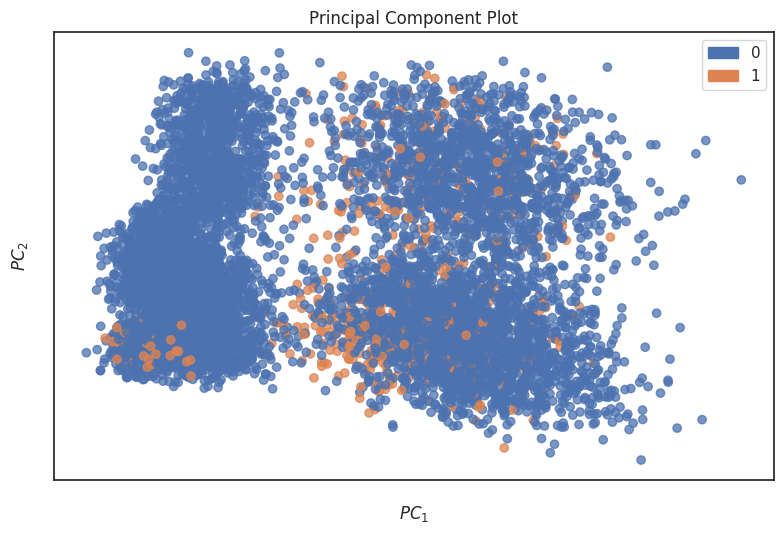

In [ ]:
pca_decomposition(X, y.astype(int), projection=2);

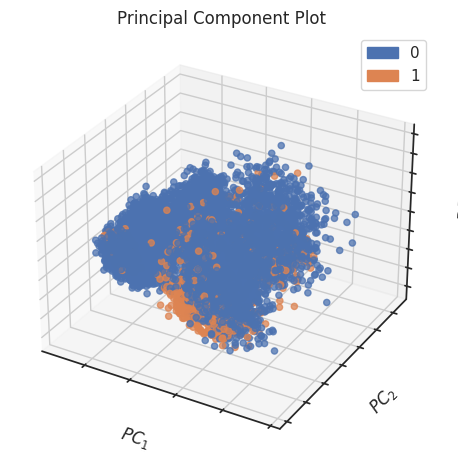

In [ ]:
pca_decomposition(X, y.astype(int), projection=3);

In [ ]:
import math

def shannon_entropy(y):
    n = len(y)
    unique, counts = np.unique(y, return_counts=True)
    probs = counts / n
    entropy = 0
    for pi in probs:
        entropy -= pi * math.log2(pi)
    return entropy

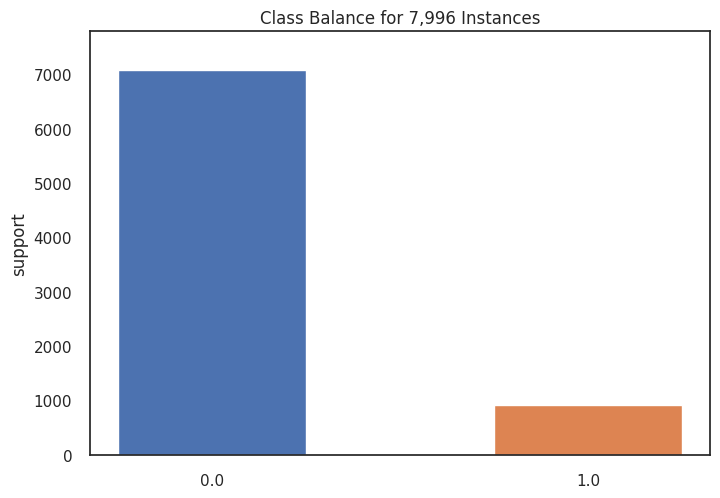

Entropy =  0.5120331864708901


In [ ]:
class_balance(y)
print('Entropy = ', shannon_entropy(y))

**6.1 PCA : LogisticRegression Model**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
# เลือก features ที่จะใช้ในการทำ PCA 

features = ["chromium", "aluminium","bacteria","chloramine","barium"]    

# แบ่งข้อมูลเป็น train set และ test set
x_train, x_test, y_train, y_test = train_test_split(df[features], df['is_safe'], test_size=0.3, random_state=0)

# สกัด features ที่เลือกและทำ scaling ใน train set
x_train = StandardScaler().fit_transform(x_train)

# ทำ PCA และเลือกจำนวน components ที่จะใช้
pca = PCA(n_components=5)
principal_components = pca.fit_transform(x_train)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# สร้างโมเดล Logistic Regression
model = LogisticRegression(random_state=0)
model.fit(principal_df, y_train)

# ทำ PCA กับ test set
test_principal_components = pca.transform(StandardScaler().fit_transform(x_test))
test_principal_df = pd.DataFrame(data=test_principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# ทำนายผลการทดสอบ
y_pred = model.predict(test_principal_df)

# หาค่า Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {0:0.2f}'.format(accuracy))

Accuracy: 0.87


In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['is_safe'], test_size=0.3, random_state=0)
# สกัด features ที่เลือกและทำ scaling ใน train set
x_train = StandardScaler().fit_transform(x_train)

# ทำ PCA และเลือกจำนวน components ที่จะใช้
pca = PCA(n_components=5)
principal_components = pca.fit_transform(x_train)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# สร้างโมเดล Logistic Regression
model = LogisticRegression(random_state=0)
model.fit(principal_df, y_train)

# ทำ PCA กับ test set
test_principal_components = pca.transform(StandardScaler().fit_transform(x_test))
test_principal_df = pd.DataFrame(data=test_principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# ทำนายผลการทดสอบ
y_pred = model.predict(test_principal_df)

# หาค่า Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {0:0.2f}'.format(accuracy))

Accuracy: 0.88


**6.2 PCA : RandomForest Model**

In [ ]:
# เลือก features ที่จะใช้ในการทำ PCA
features = ["aluminium","perchlorate","cadmium","arsenic","ammonia"]    

# แบ่งข้อมูลเป็น train set และ test set
x_train, x_test, y_train, y_test = train_test_split(df[features], df['is_safe'], test_size=0.3, random_state=0)

# สกัด features ที่เลือกและทำ scaling ใน train set
x_train = StandardScaler().fit_transform(x_train)

# ทำ PCA และเลือกจำนวน components ที่จะใช้
pca = PCA(n_components=5)
principal_components = pca.fit_transform(x_train)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4','PC5'])

# สร้างโมเดล RandomForest
model = RandomForestClassifier(n_estimators=100)
model.fit(principal_df, y_train)

# ทำ PCA กับ test set
test_principal_components = pca.transform(StandardScaler().fit_transform(x_test))
test_principal_df = pd.DataFrame(data=test_principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
# ทำนายผลการทดสอบ
y_pred = model.predict(test_principal_df)

# หาค่า Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {0:0.2f}'.format(accuracy))

Accuracy: 0.94


In [ ]:

# แบ่งข้อมูลเป็น train set และ test set
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['is_safe'], test_size=0.3, random_state=0)

# สกัด features และทำ scaling ใน train set
x_train = StandardScaler().fit_transform(x_train)

# ทำ PCA และเลือกจำนวน components ที่จะใช้
pca = PCA(n_components=5)
principal_components = pca.fit_transform(x_train)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# สร้างโมเดล Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(principal_df, y_train)

# ทำ PCA กับ test set
test_principal_components = pca.transform(StandardScaler().fit_transform(x_test))
test_principal_df = pd.DataFrame(data=test_principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# ทำนายผลการทดสอบ
y_pred = model.predict(test_principal_df)

# หาค่า Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {0:0.2f}'.format(accuracy))

Accuracy: 0.89


**Note:** 

1.ทำ PCA : LogisticRegression Model แบบเลือก Feature ที่มีความสำคัญมา 5 Feature ได้ค่า Accuracy: 0.87 ซึ่งน้อยกว่าแบบไม่เลือก Feature ที่ได้ค่า Accuracy: 0.88 

2.ทำ PCA : RandomForest Model แบบเลือก Feature ที่มีความสำคัญมา 5 Feature ได้ค่า Accuracy: 0.94 ซึ่งมากกว่าแบบไม่เลือก Feature ที่ได้ค่า Accuracy: 0.89

**เปรียบเทียบผลการเลือกฟีเจอร์ กับการใช้ PCA**

**RandomForest Model**

1.จากการทำวิธี Feature Selection โดย ตัด Feature ที่มีความสำคัญน้อยที่สุดออก 1 ตัวให้ค่า Accuracy สูงสุด = 0.96 เทียบกับวิธี PCA โดยเลือก features ที่จะใช้ในการทำ PCA ให้ค่า Accuracy สูงสุด = 0.94

จะเห็นได้ว่าการทำ feature selection เป็นวิธีที่มีประสิทธิภาพดีกว่า

**LogisticRegression Model**

1.จากการทำวิธี Feature Selection ให้ค่า Accuracy = 0.90375 เทียบกับวิธี PCA ให้ค่า Accuracy สูงสุด = 0.88


จะเห็นได้ว่าการทำ feature selection เป็นวิธีที่มีประสิทธิภาพดีกว่า



**สรุปได้ว่า**

การทำ feature selection เป็นวิธีที่มีประสิทธิภาพดีกว่า  PCA จากการทดลองทั้ง 2 Model คาดว่าเป็นเพราะ Features Selection จะพยายามเลือกเฉพาะ Features ที่มีผลต่อ Prediction เยอะกว่ามาใช้ ส่วน PCA เป็นการลดมิติของข้อมูล ทำให้ความถูกต้องและความแม่นยำของ Model ลดต่ำลง



# **7.เทคนิคการลดมิติของข้อมูล**

### t-SNE 

<Axes: xlabel='tsne1', ylabel='tsne2'>

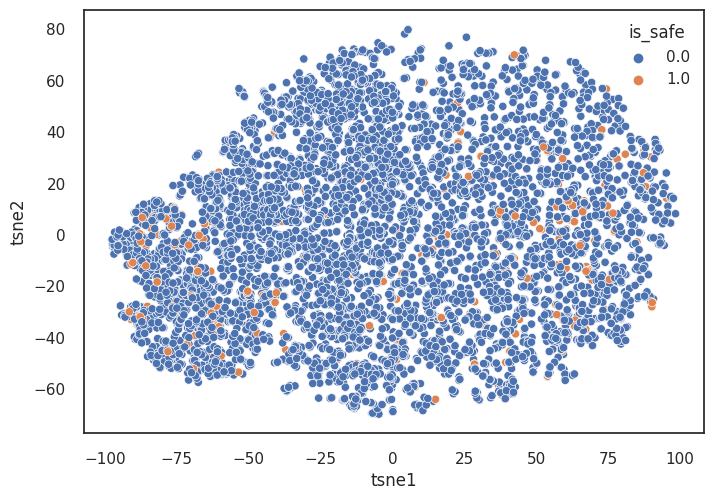

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE

# เลือก features
features = ['mercury','selenium','flouride','copper','lead','barium', 'bacteria','chromium','nitrites','radium']

# สกัด features และทำ scaling
x = StandardScaler().fit_transform(df[features])

# ทำ t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(x)

# สร้าง dataframe จาก t-SNE results
df_tsne = pd.DataFrame(data=tsne_results, columns=['tsne1', 'tsne2'])
df_tsne['is_safe'] = df['is_safe'].values

# สร้าง scatter plot และแยกสีตามคลาส
sns.scatterplot(data=df_tsne, x='tsne1', y='tsne2', hue='is_safe')

**Note:** จะเห็นได้ว่ามีการแบ่งกลุ่มข้อมูลที่ไม่ชัดเจน และยังไม่สามารถแยกคลาสได้อย่างชัดเจนเท่าที่ควร ดังนั้น การใช้ t-SNE แยกข้อมูลดูไม่ค่อยดีเท่าที่ควร สำหรับข้อมูลชุดนี้

## UMAP

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=5dcda1bba39762605bab1f4b95a38e05cc90ca542a7b8398d4e87b9db25f4a74
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55640 sha256=d9d75d0ca87b7208c5a6663eb1372f8731c2a730314c599ae7c7bb3525d31e93
  Stored in directory: /root/.cache/pip/wheels/12/f9/4d/ec5ad1c823c710fcc4473669fdcffc8891f4bc398c841af22e
Successfully built umap-learn pynndescent


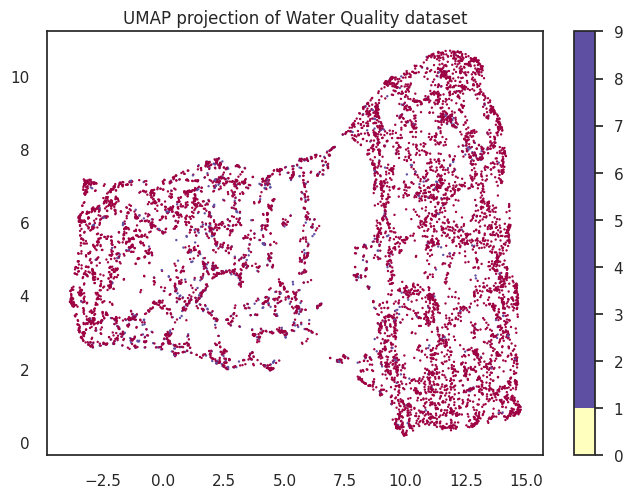

In [ ]:
# !pip install umap-learn
import umap
import matplotlib.pyplot as plt


# สร้าง UMAP model
reducer = umap.UMAP()

# ลดมิติของข้อมูล  จาก 20 มิติเป็น 2 มิติ
embedding = reducer.fit_transform(df)

# สร้าง scatter plot ด้วย matplotlib
plt.scatter(embedding[:, 0], embedding[:, 1], c=df['is_safe'], cmap='Spectral', s=0.5)
plt.colorbar(boundaries=range(10))
plt.title('UMAP projection of Water Quality dataset', fontsize=12)
plt.show()

In [ ]:
import umap  # pip install umap-learn

manifold = umap.UMAP().fit(X, y)
X_reduced = manifold.transform(X)

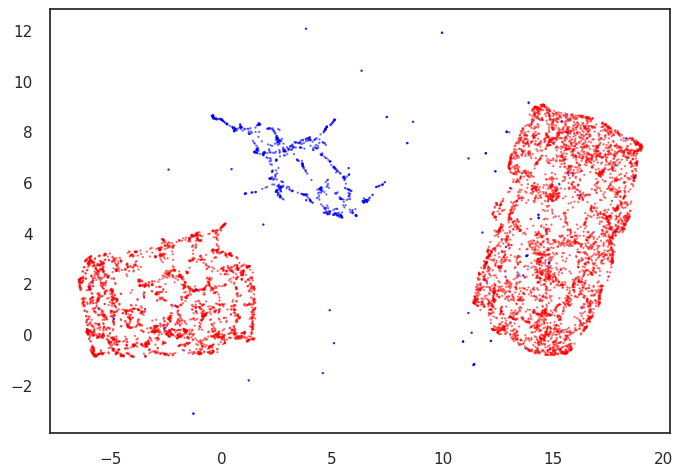

In [ ]:
from matplotlib.colors import ListedColormap

my_colors = ['red', 'blue']
cmap = ListedColormap(my_colors)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=cmap, alpha=0.5, s=0.5)
plt.show()

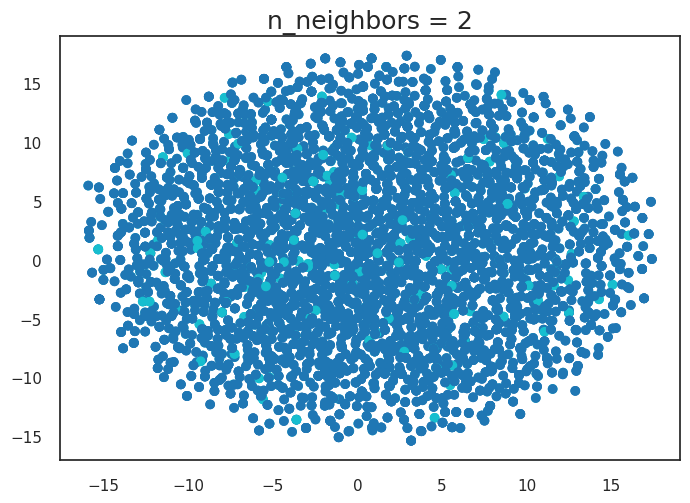

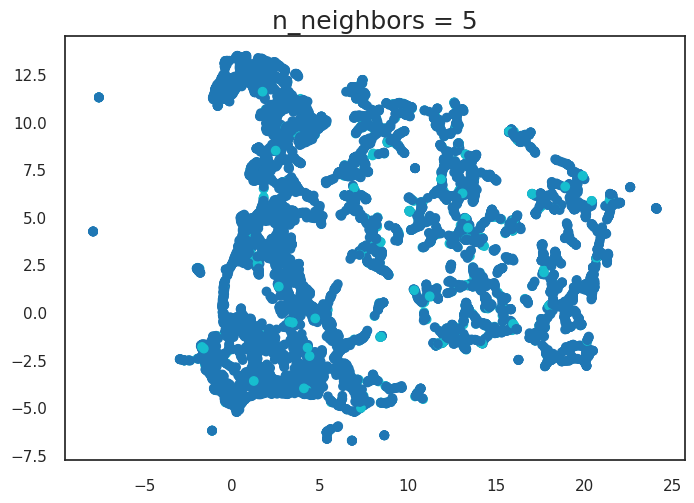

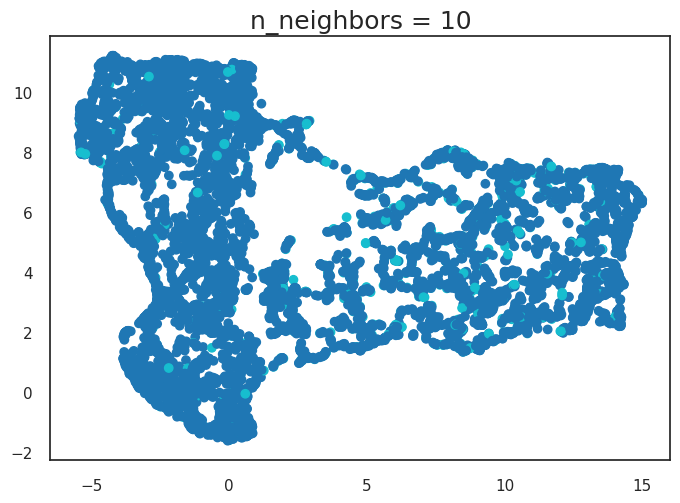

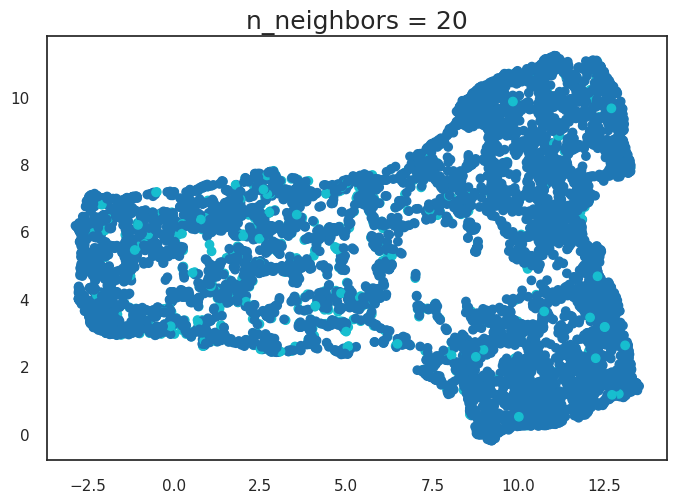

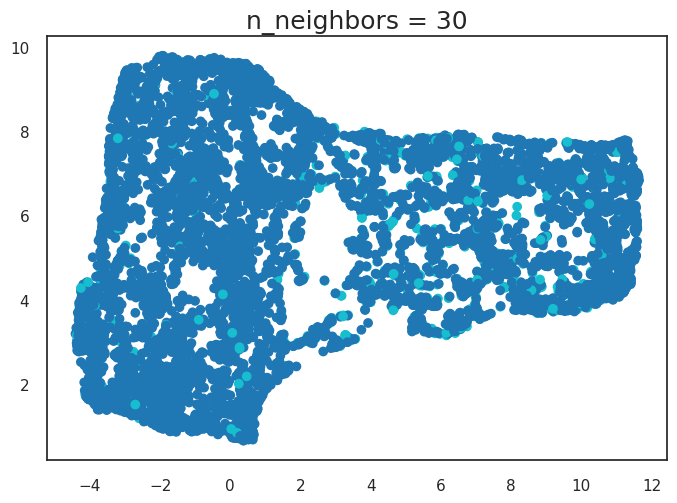

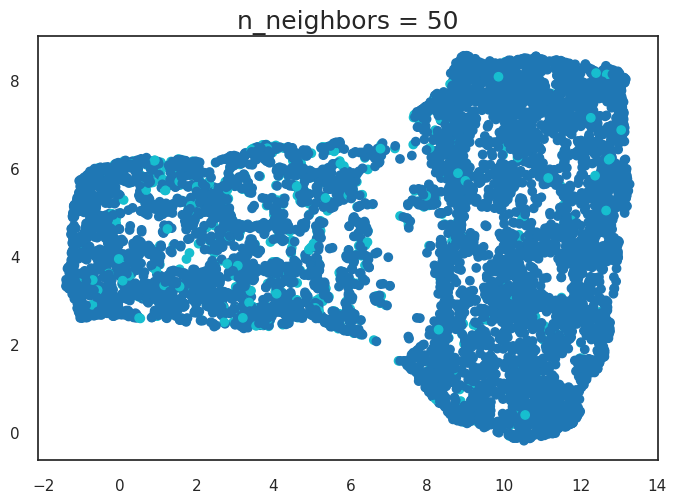

In [ ]:
def draw_umap(n_neighbors=25, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(X);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=df)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=plt.cm.tab10(df['is_safe']))
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=df, s=100)
    plt.title(title, fontsize=18)
for n in (2, 5, 10, 20, 30, 50):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

**Note:** แม้ว่าจะทดลองปรับค่าพารามิเตอร์แล้ว แต่ก็ยังมีการแบ่งกลุ่มข้อมูลที่ไม่ชัดเจน และยังไม่สามารถแยกคลาสได้อย่างชัดเจนเท่าที่ควร ดังนั้น การใช้ Umap แยกข้อมูลดูไม่ค่อยดีเท่าที่ควร สำหรับข้อมูลชุดนี้

ความยากลำบากในการแบ่งกลุ่มของข้อมูลชุดนี้ คือ ไม่สามารถแบ่งกลุ่มและแยกคลาสได้ชัดเจนทั้งสองวิธี 

# **8.Conclusion**

**1.จากการนำข้อมูล Original Data มาทดสอบเข้า Model ทั้ง 3 Model ได้ค่า Accuracy ดังนี้**

1.   SVM Model ได้ค่า Accuracy = 0.91
2.   Logistic Regression Model ได้ค่า Accuracy = 0.90
3.   Random Forest Model ได้ค่า Accuracy = 0.94


สรุปได้ว่า Random Forest Model มีค่า Accuracy สูงที่สุด


**2.เราจึงเลือก Random Forest Model มาทำการแก้ปัญหา Imbalance ต่อ
ด้วยเทคนิค**

1.   Class Re-Weights 
2.   SMOTE 
3.   OverSampling


สรุปได้ว่า การแก้ปัญหาด้วยวิธี Class Re-Weights ดีที่สุด เนื่องจากได้ค่า Accuracy = 0.93 (แต่ก็ยังน้อยกว่า Accuracy ของ Original Data ซึ่งเท่ากับ 0.94 )
ดังนั้น จะเห็นได้ว่าการแก้ปัญหาด้วยวิธี Imbalance ไม่ได้ทำให้ Accuracy สูงกว่าเดิม สำหรับข้อมูลชุดนี้


**3.Feature Selection**

จากการทำ Feature Selection ด้วย RandomForest Model สามารถสรุปได้ดังนี้
1. การตัด Feature ที่มีความสำคัญน้อยที่สุดออกเพียง 1 Feature ให้ค่า  Accuracy  สูงที่สุด 
2. เปรียบเทียบค่า Accuracy ระหว่างตัดการ Feature และไม่ตัด Feature พบว่าการตัด Feature ให้ค่า Accuracy มากกว่าการใช้ข้อมูลเต็ม Feature (Accuracy = 0.94)

จากการทำ Feature Selection ด้วย LogisticRegression  สามารถสรุปได้ดังนี้
1. การทำ Feature Selection ด้วย LogisticRegression ให้ค่า Accuracy มากกว่าการใช้ข้อมูลเต็ม Feature (Accuracy = 0.90)


**4.เปรียบเทียบผลการเลือกฟีเจอร์ กับการใช้ PCA**

**RandomForest Model**

1.จากการทำวิธี Feature Selection โดย ตัด Feature ที่มีความสำคัญน้อยที่สุดออก 1 ตัวให้ค่า Accuracy สูงสุด = 0.96 เทียบกับวิธี PCA โดยเลือก features ที่จะใช้ในการทำ PCA ให้ค่า Accuracy สูงสุด = 0.94


**LogisticRegression Model**

1.จากการทำวิธี Feature Selection ให้ค่า Accuracy = 0.90375 เทียบกับวิธี PCA ให้ค่า Accuracy สูงสุด = 0.88

**สรุปได้ว่า**

การทำ feature selection เป็นวิธีที่มีประสิทธิภาพดีกว่า  PCA จากการทดลองทั้ง 2 Model คาดว่าเป็นเพราะ Features Selection จะพยายามเลือกเฉพาะ Features ที่มีผลต่อ Prediction เยอะกว่ามาใช้ ส่วน PCA เป็นการลดมิติของข้อมูล ทำให้ความถูกต้องและความแม่นยำของ Model ลดต่ำลง

**5.เทคนิคการลดมิติของข้อมูล**

จากการทดลองใช้เทคนิคการลดมิติของข้อมูล ด้วยวิธี t-SNE และ UMAP  แล้ว plot ออกมาเป็นกราฟ 2 มิติ
พบความยากลำบากในการแบ่งกลุ่มของข้อมูลชุดนี้ คือ ไม่สามารถแบ่งกลุ่ม และแยกคลาสได้ชัดเจนทั้ง 2 วิธี จึงทำให้ไม่สามารถแยก safe กับ not safe ได้